# Import librairies

In [1]:
import sys
import os
import configparser
import base64

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../utile")
from database import create_cnx, config_parse
from data import (
    plot_text_feature,
    plot_continous_feature,
    plot_link_texual_features,
    plot_link_numeric_features,
    DataSet,
)

path = "../data"
plt.rcParams["figure.figsize"] = (15, 15)

# Loading data

## Load dataset

In [5]:
parser = config_parse()
cnx = create_cnx(parser)["cnx"]
curs = cnx.cursor()
sql_request = """SELECT * from data_SCOR """
curs.execute(sql_request)
names = [x[0] for x in curs.description]
rows = curs.fetchall()


numeric_features = [
    "Area_Sown_Ha",
    "Area_Insured_Ha",
    "SI_Per_Ha_Inr_Ha",
    "Sum_Insured_Inr",
    "Indemnity_Level",
]
textual_features = [
    "District",
    "Sub_District",
    "Crop",
    "Block",
    "State",
    "GP",
    "Season",
    "Cluster",
]
df = DataSet(
    numeric_features=numeric_features,
    textual_features=textual_features,
    data=rows,
    columns=names,
)
# df = pd.DataFrame(rows, columns=names)
df.drop("id", inplace=True, axis=1)

In [ ]:
for column in df.columns:
    print(
        f"The sparisity of the column {column} is {100*len(df[df[column].isna()])//len(df)}%"
    )

# Preprocess of the data

In [3]:
df.set_years_to_keep()
# df.pre_process_numeric()
df.subset_data()

/appli/notebooks/../utile/data.py:63: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.years_crop_yields = [f"{year}_Yield" for year in years_to_keep]


# Data exploration

## Feature exploration

### State

__Refers to Indian state or union territory. India has 28 states and 8 union territories. Not all territories are part of the insured program.__

In [5]:
df["State"].value_counts()

Madhya Pradesh    27340
Andhra Pradesh    22940
Karnataka         22361
Bihar              7951
Jharkhand          1051
Gujarat             769
Haryana             685
Name: State, dtype: int64

/appli/notebooks/../utile/data.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


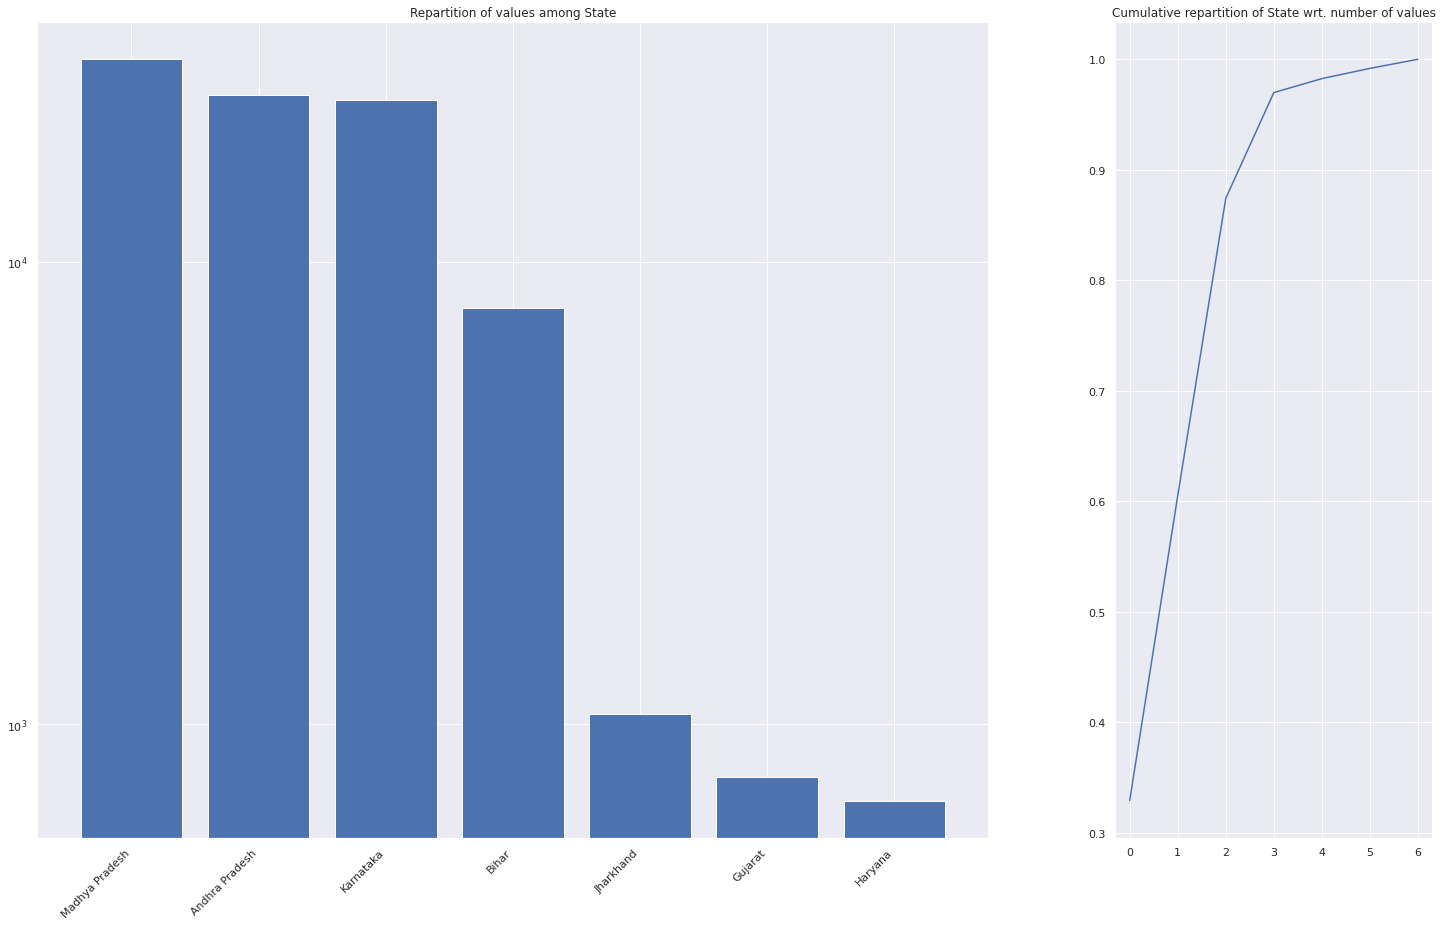

In [6]:
plot_text_feature(df, "State", k=20, logY=True)

### Cluster

__Clusters are a subdivision of each State, as part of the insurance scheme. Each Indian State defines its own “clusters”. Clusters are not in general official administrative divisions of India.__

In [7]:
df["Cluster"].value_counts()

2     21766
1     18002
4     13394
3      8628
5      8618
6      4731
9      2174
10     2167
7      1897
8      1706
Name: Cluster, dtype: int64

In [8]:
df["Cluster"] = df["Cluster"].astype(str)

/appli/notebooks/../utile/data.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


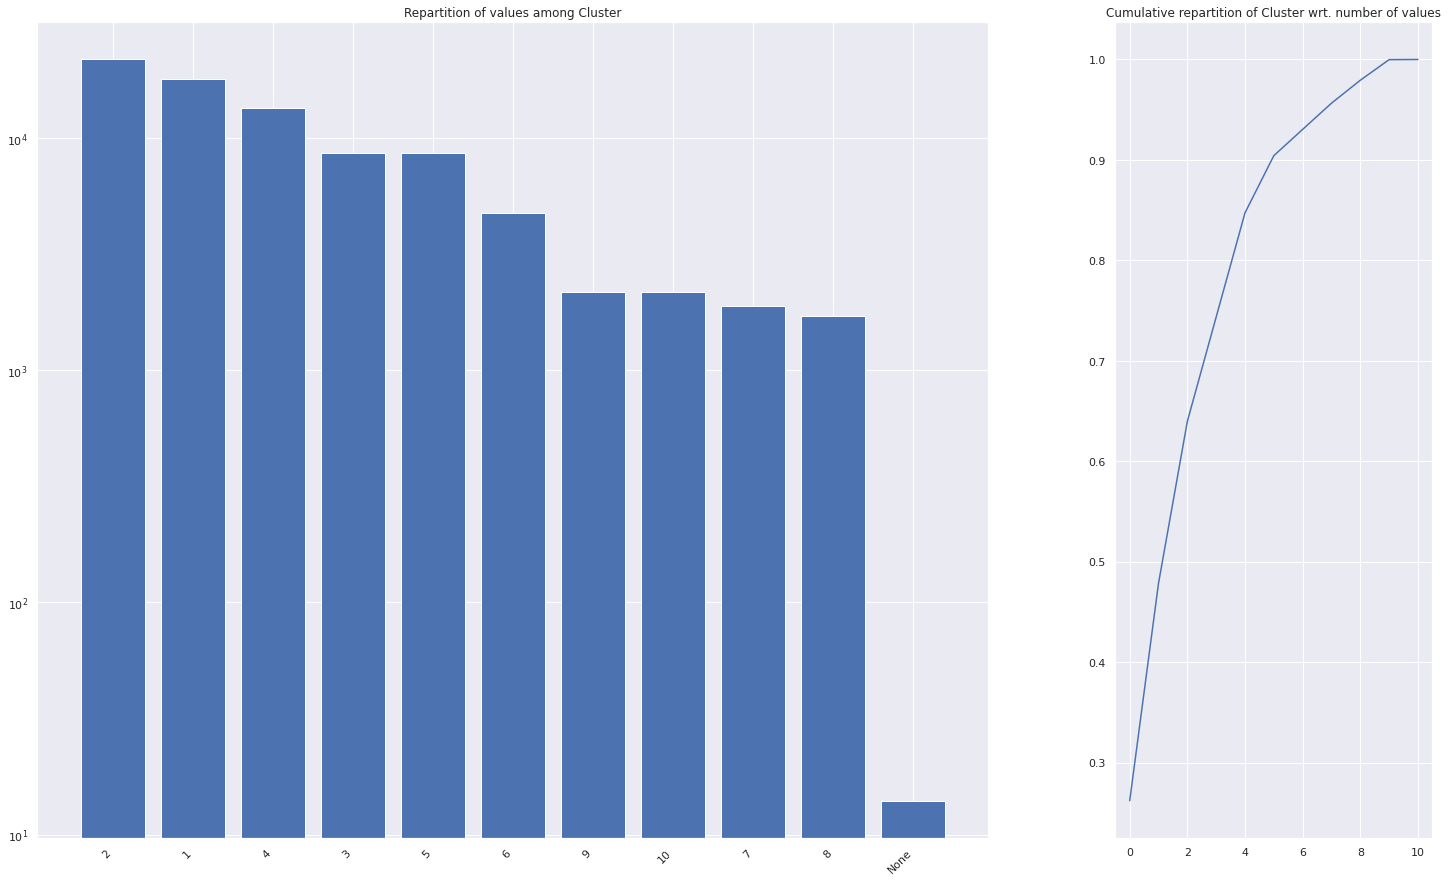

In [9]:
plot_text_feature(df, "Cluster", k=20, logY=True)

### District

__An administrative division of an Indian state (or territory). Each cluster (as defined above) contains several districts; one district belongs to only cluster (within a state).__

In [10]:
df["District"].value_counts()

Prakasam            3285
Vishakhapatnam      2954
East Godavari       2565
Nellore             2119
Srikakulam          1887
                    ... 
Dangs                  6
Chhota Udaipur         6
Devbhoomi Dwarka       4
Navsari                4
Valsad                 1
Name: District, Length: 209, dtype: int64

/appli/notebooks/../utile/data.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


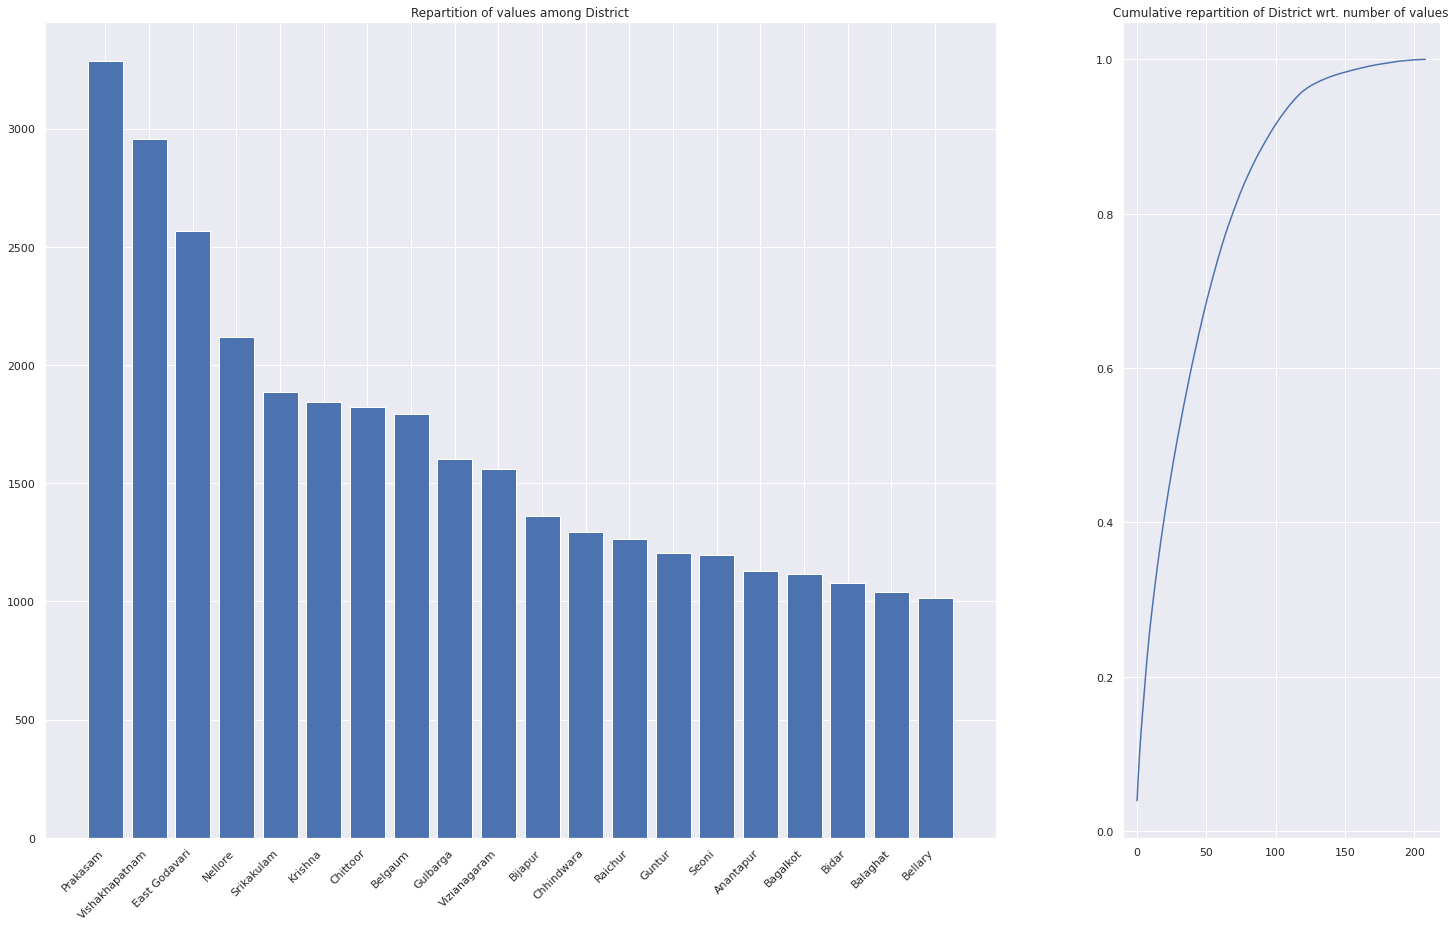

In [11]:
plot_text_feature(df, "District", k=20)

### Sub-district

__A further (administrative) subdivision of districts. Some districts are divided into sub-districts, other in blocks (see below).__

In [12]:
df["Sub_District"].value_counts()

MUNCHINGI PUTTU    308
SOHAGPUR           298
DINDORI            283
ANANTHAGIRI        271
PEDA BAYALU        268
                  ... 
Khagaria             1
Manihari             1
Kursela              1
Korha                1
Nardiganj            1
Name: Sub_District, Length: 3053, dtype: int64

/appli/notebooks/../utile/data.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


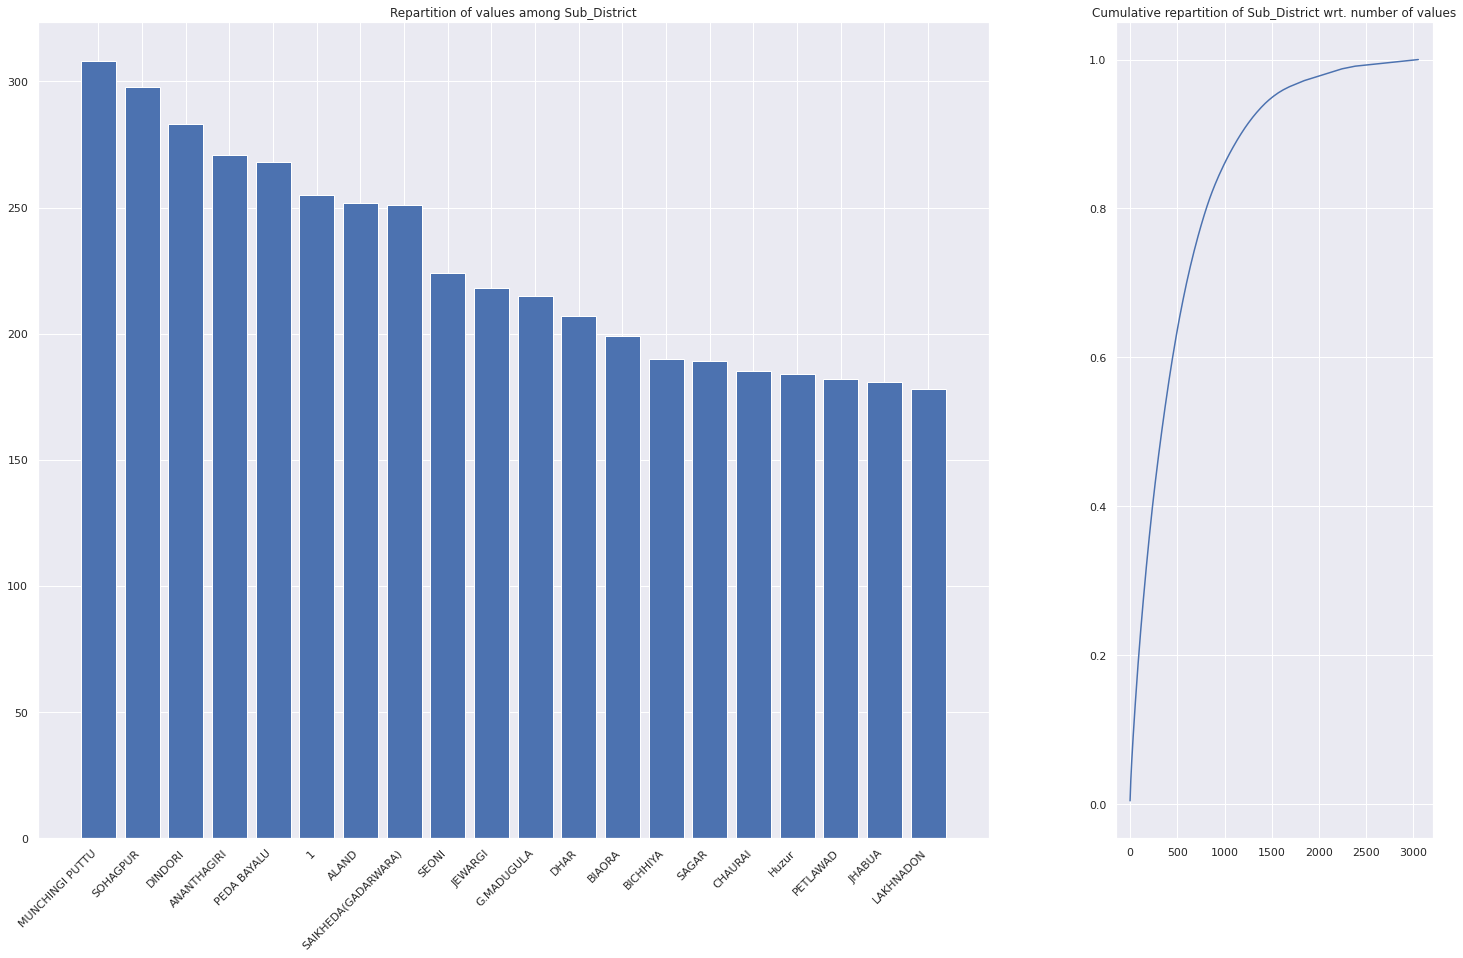

In [13]:
plot_text_feature(df, "Sub_District", k=20)

### Block

__A further (administrative) subdivision of districts, more “granular” than sub-divisions. Also called Tehsils or Talukas, they can be seen as a conglomerate of villages.__

In [14]:
df["Block"].value_counts()

10           433
9            427
5            427
1            423
23           422
            ... 
Fatwah         1
Ghosbari       1
Khusrupur      1
Mokamah        1
SHAJAPUR       1
Name: Block, Length: 3492, dtype: int64

/appli/notebooks/../utile/data.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


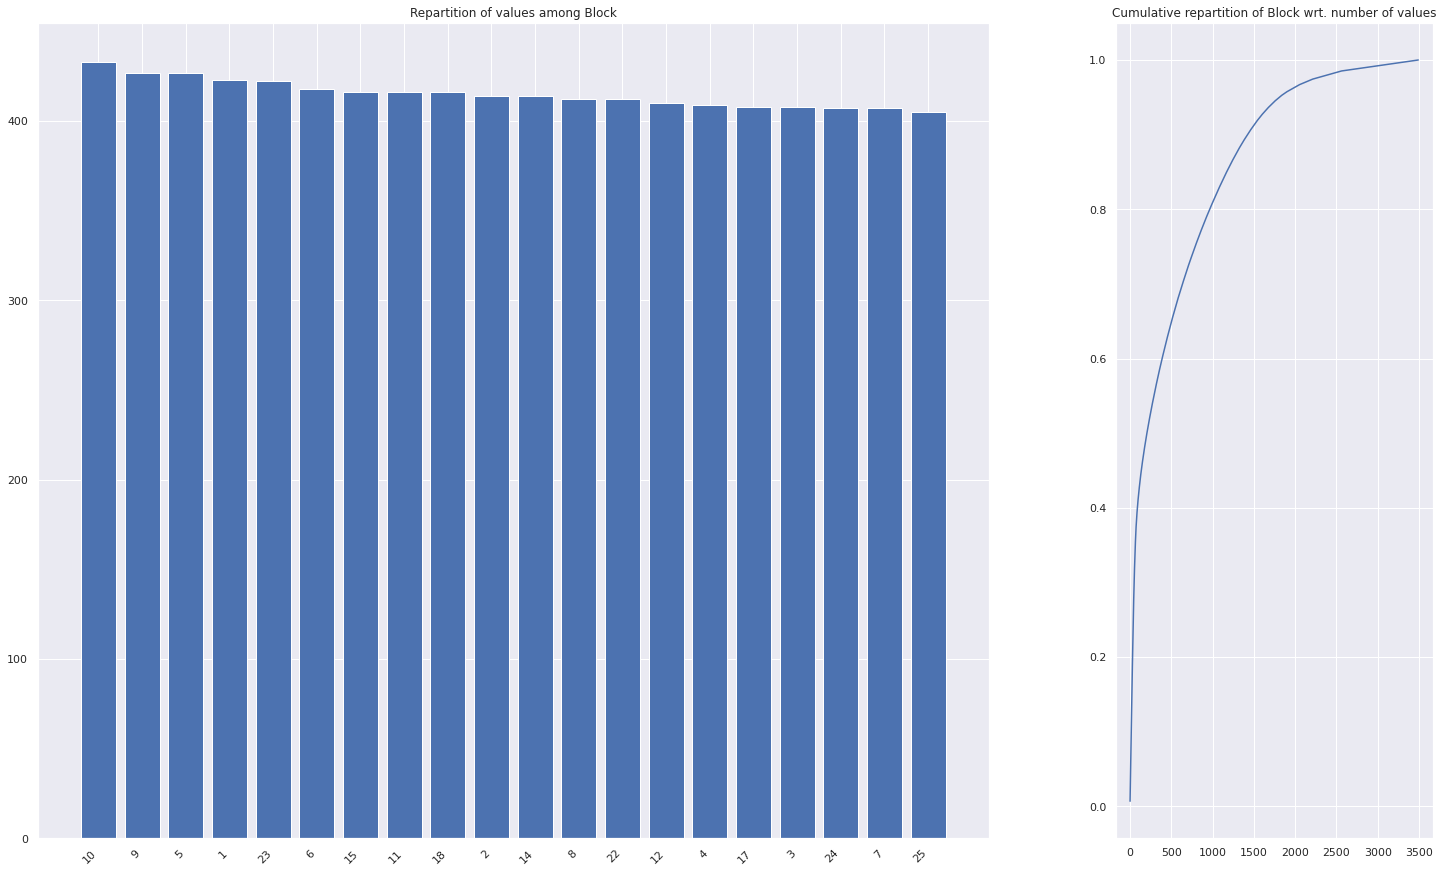

In [15]:
plot_text_feature(df, "Block", k=20)

### GP

__Gram Panchayat, or “village”. This is the most granular administrative division in India.__

In [16]:
df["GP"].value_counts()

ALL VILLAGES              84
KOTHAPALLE                37
HOSAHALLI                 36
KRISHNAPURAM              33
VENKATAPURAM              33
                          ..
BHOOLOKAPATHIVARAKATTU     1
ARIDIVALASA                1
VENDRAM                    1
VEDURUVEDA                 1
Mandya (ULB)               1
Name: GP, Length: 28105, dtype: int64

/appli/notebooks/../utile/data.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


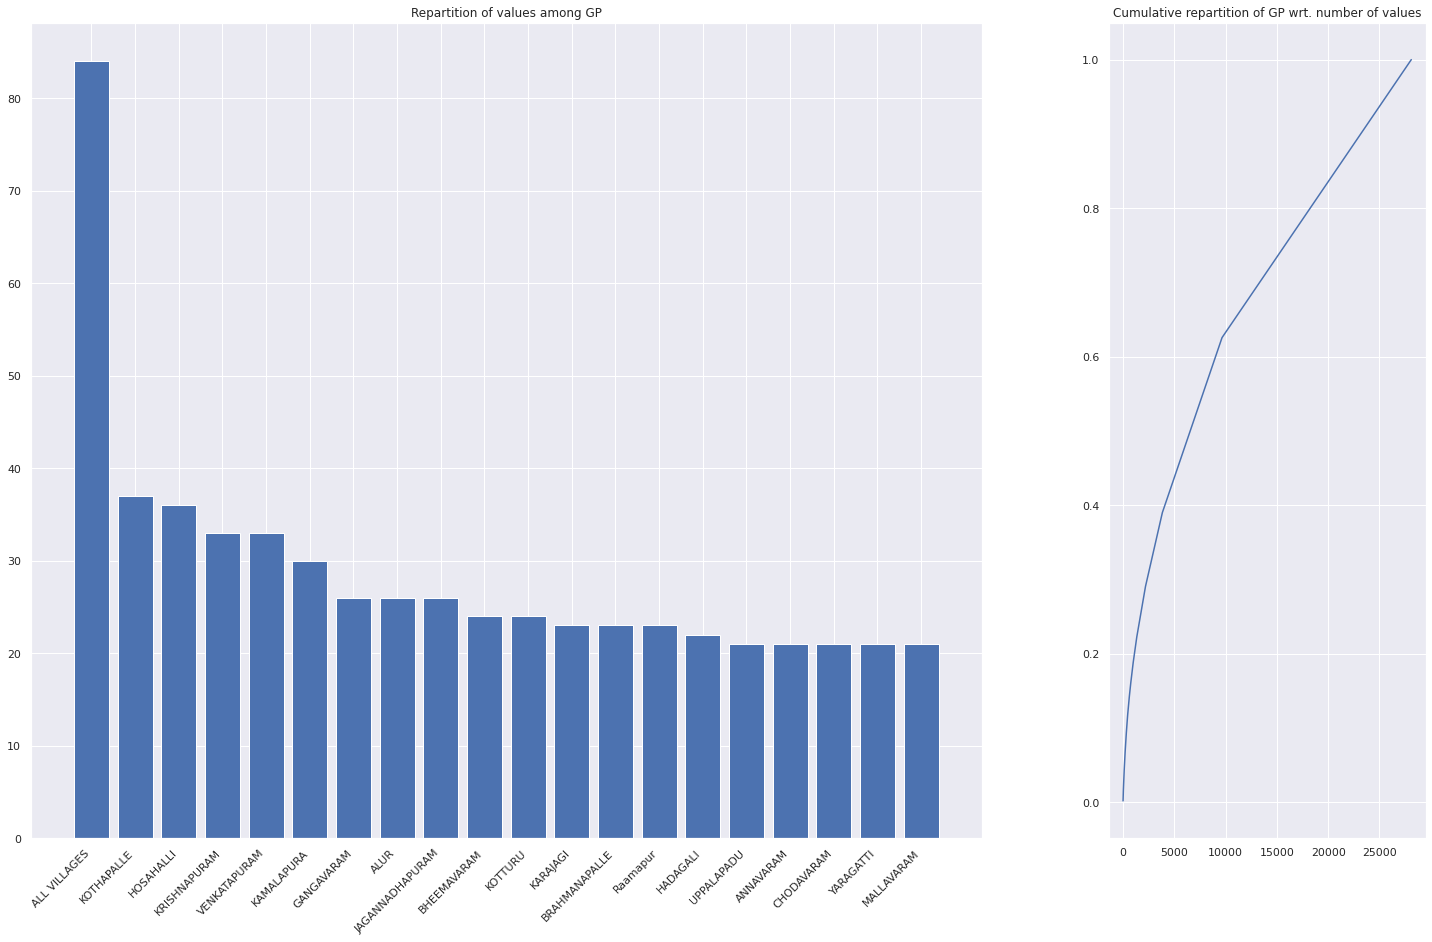

In [17]:
plot_text_feature(df, "GP", k=20)

### Season

__There are 2 main seasons in India (Kharif and Rabi). In some southern states, there are even 3 seasons (Kharif, Rabi and “summer”)__

In [18]:
df["Season"].value_counts()

Kharif    65120
Rabi      16480
Summer     1457
RABI         34
SUMMER        6
Name: Season, dtype: int64

/appli/notebooks/../utile/data.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


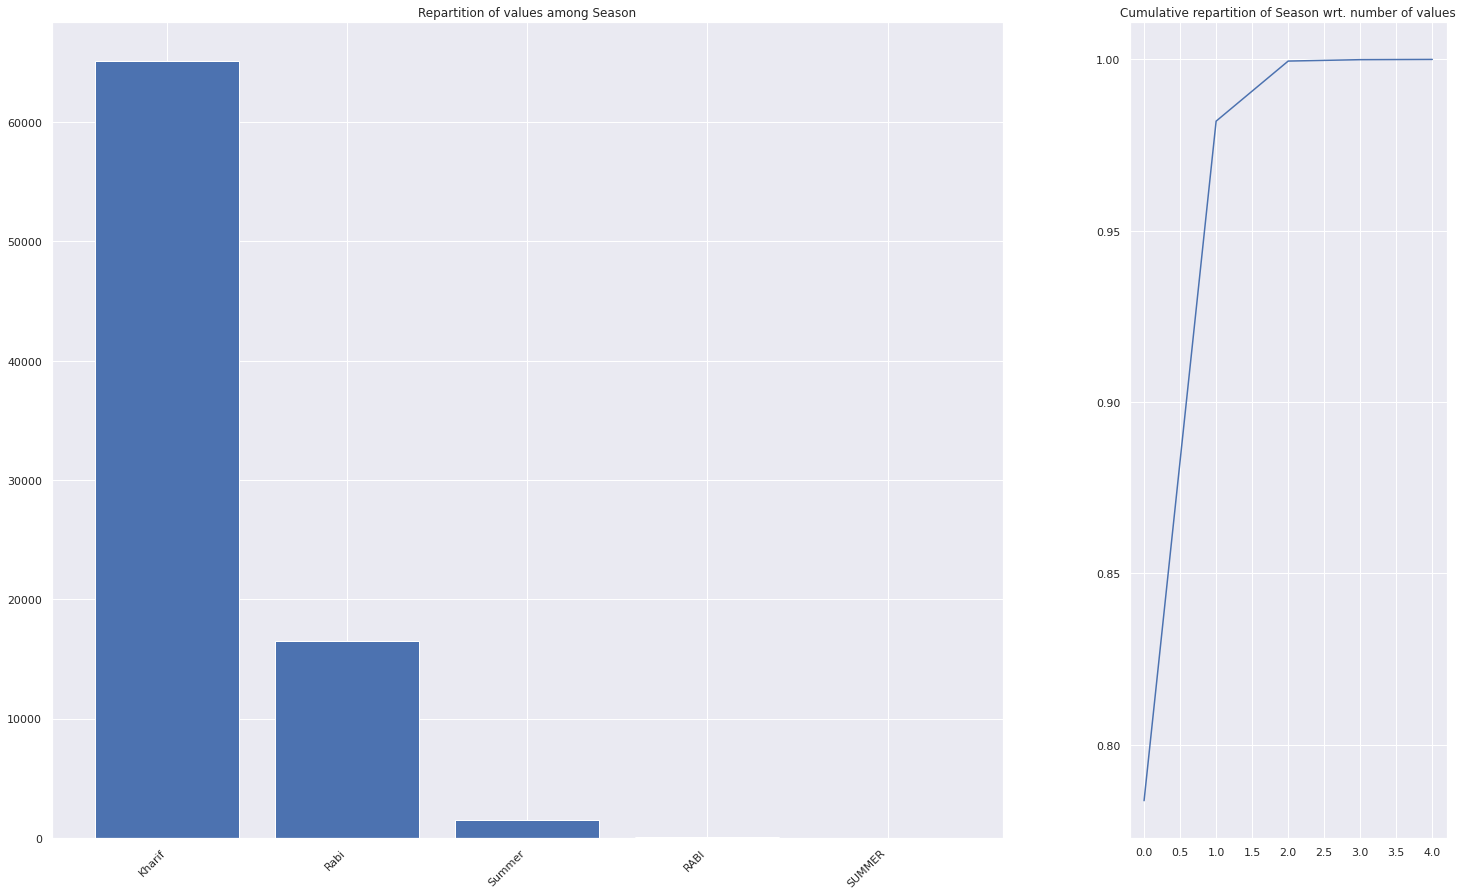

In [19]:
plot_text_feature(df, "Season", k=20)

### Crop

__The collected crop. Some crops are only grown in Kharif, other in Rabi.__

In [20]:
df["Crop"].value_counts()

Paddy           27756
Soybean         14137
Paddy Un-IRR     7477
Paddy IRR        4969
Maize            3812
                ...  
Moong              19
Beans              18
Cabbage            14
Sugarcane          13
Red Chilli         13
Name: Crop, Length: 72, dtype: int64

/appli/notebooks/../utile/data.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


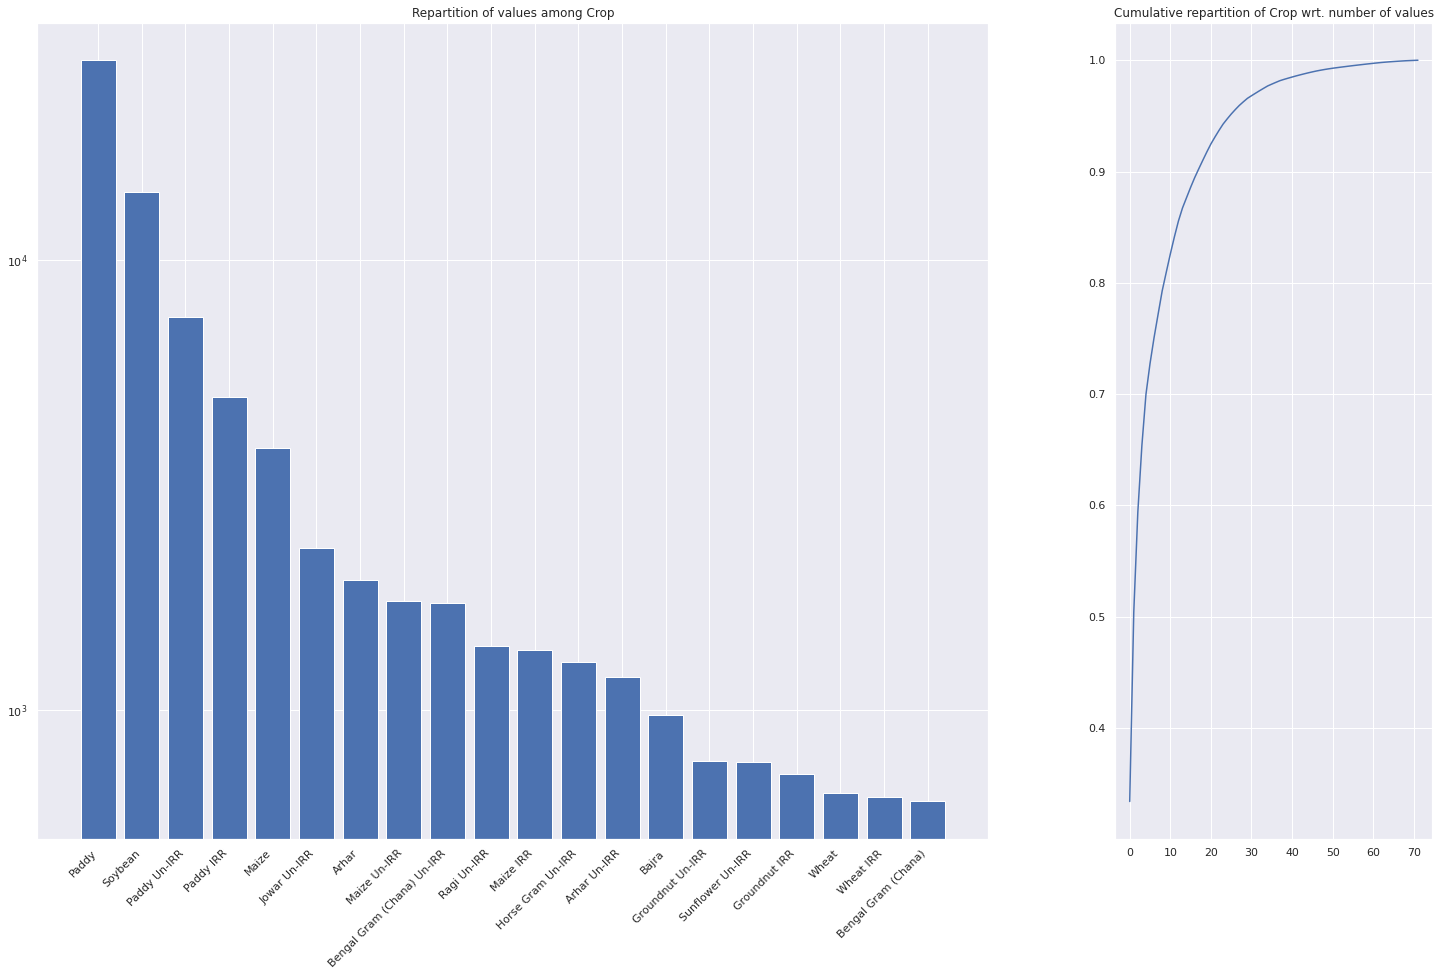

In [21]:
plot_text_feature(df, "Crop", k=20, logY=True)

### Area Sown (Ha)

__Area sown by the designated crop. This value is most often provided at district level. If repeated, this level can be at a higher / lower level.__

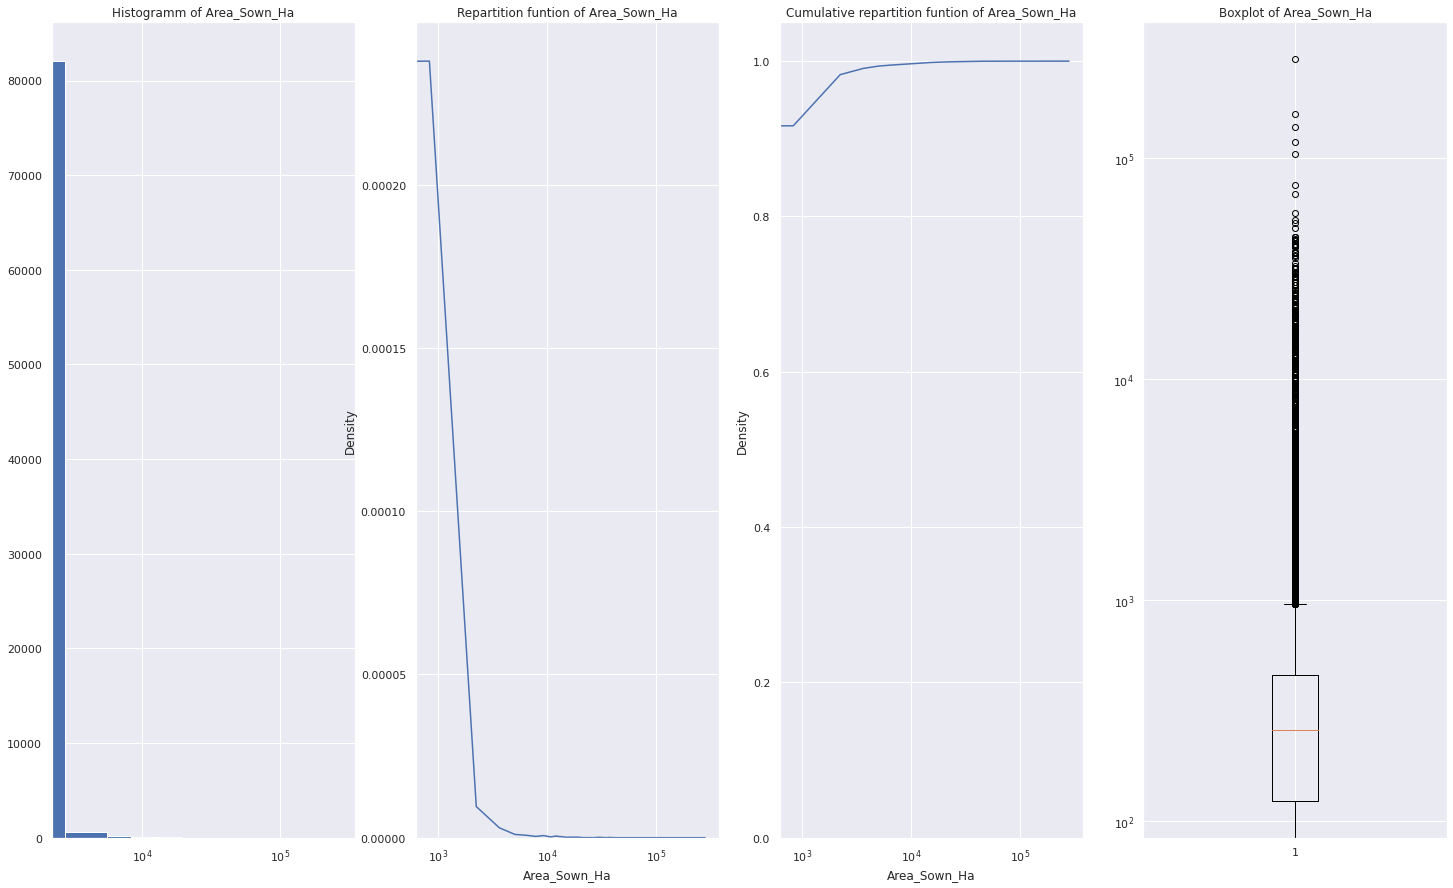

In [22]:
plot_continous_feature(df, "Area_Sown_Ha")

### Area Insured (Ha)

__Area covered by insurance scheme. This value is most often provided at district level. If repeated, this level can be at a higher / lower level.__

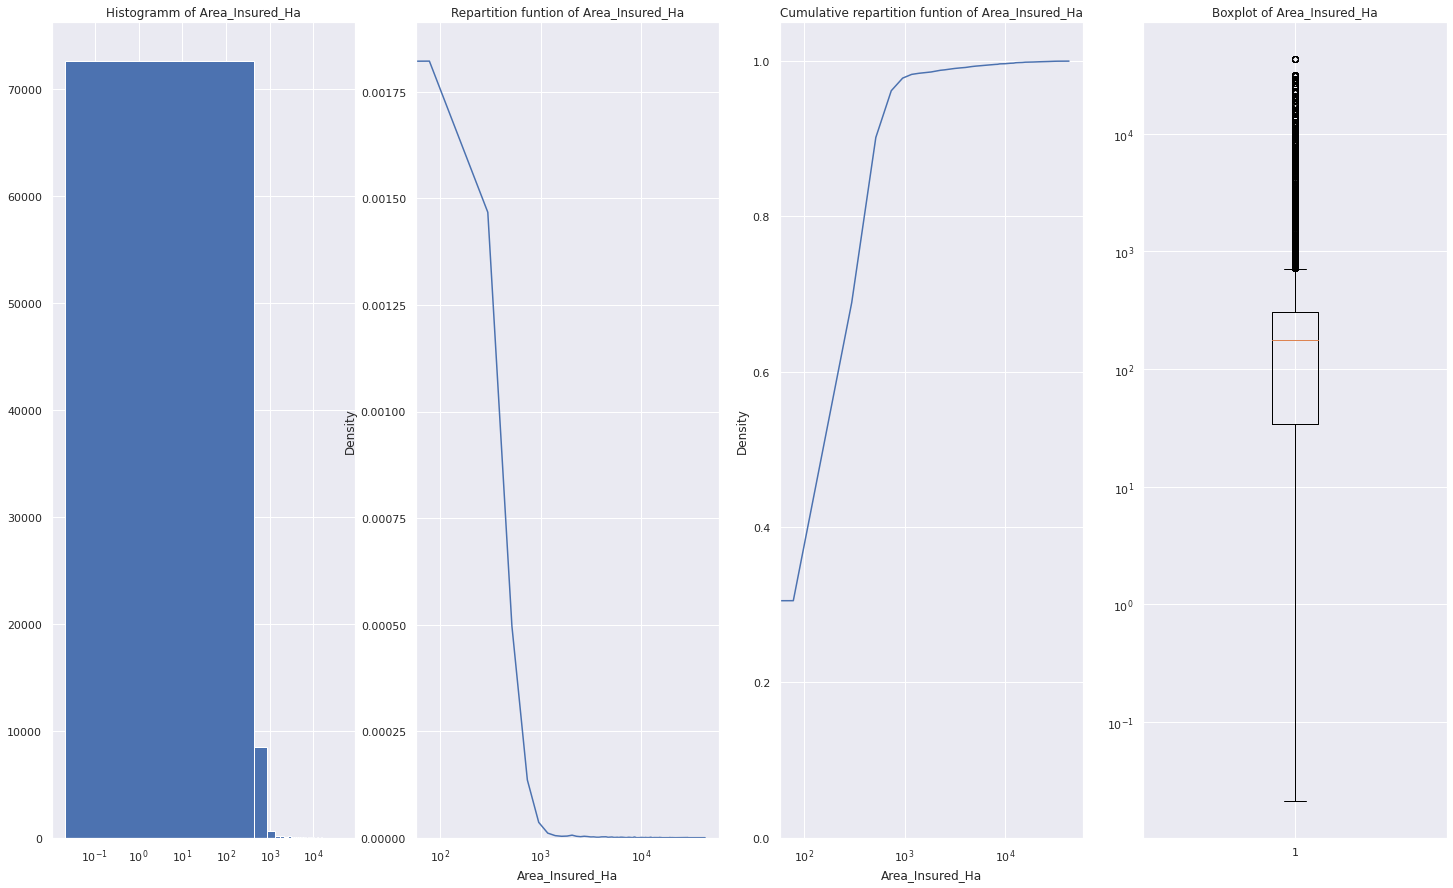

In [23]:
plot_continous_feature(df, "Area_Insured_Ha")

### SI Per Ha (Inr/Ha)

__Insured value per Ha in Indian Rupee.__

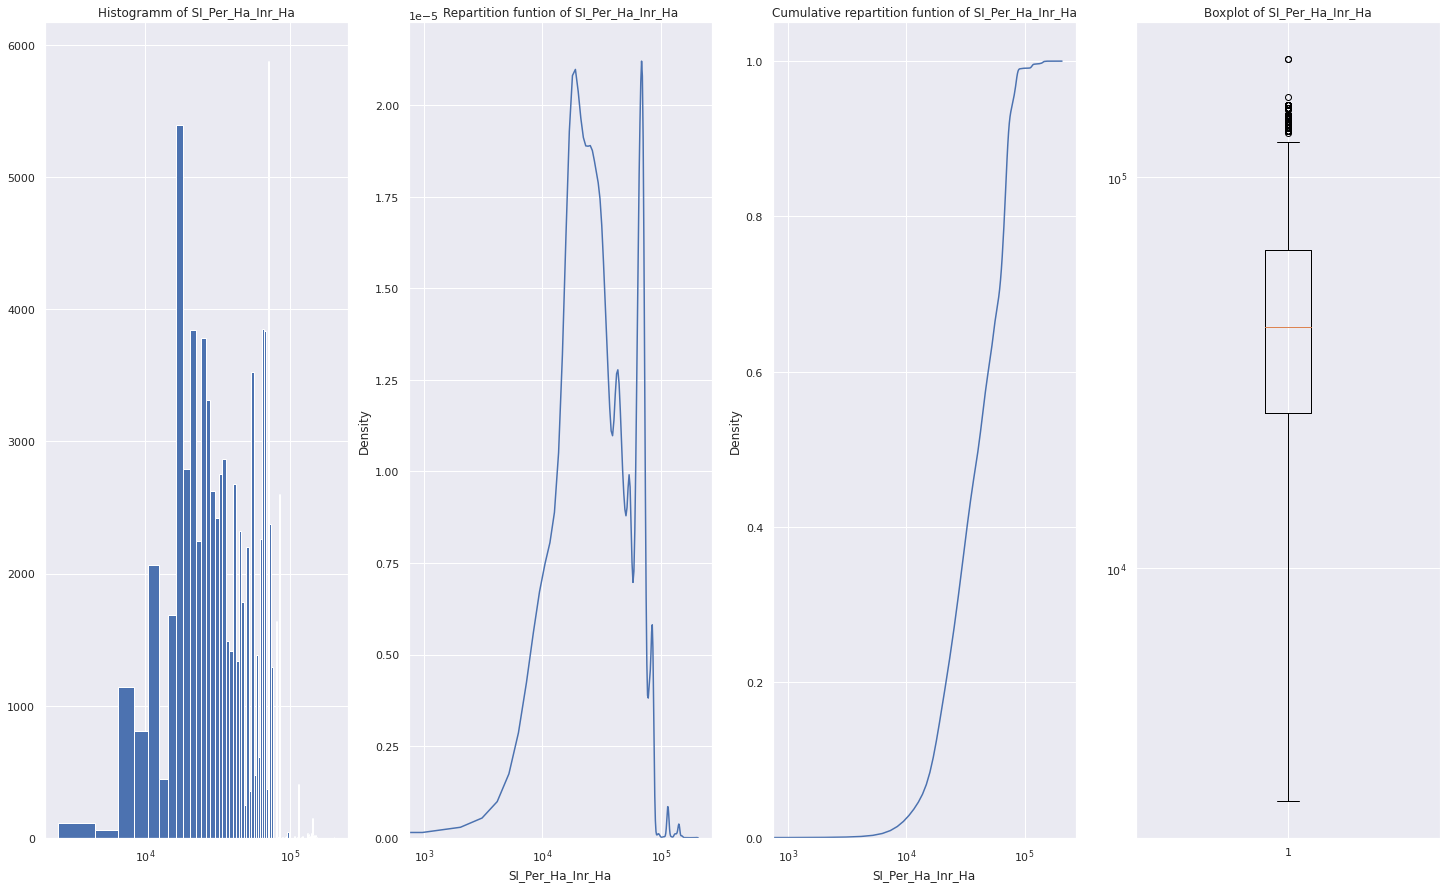

In [24]:
plot_continous_feature(df, "SI_Per_Ha_Inr_Ha")

### Sum Insured (Inr)

__Area Insured * SI per Ha (thus a total dependant variable)__

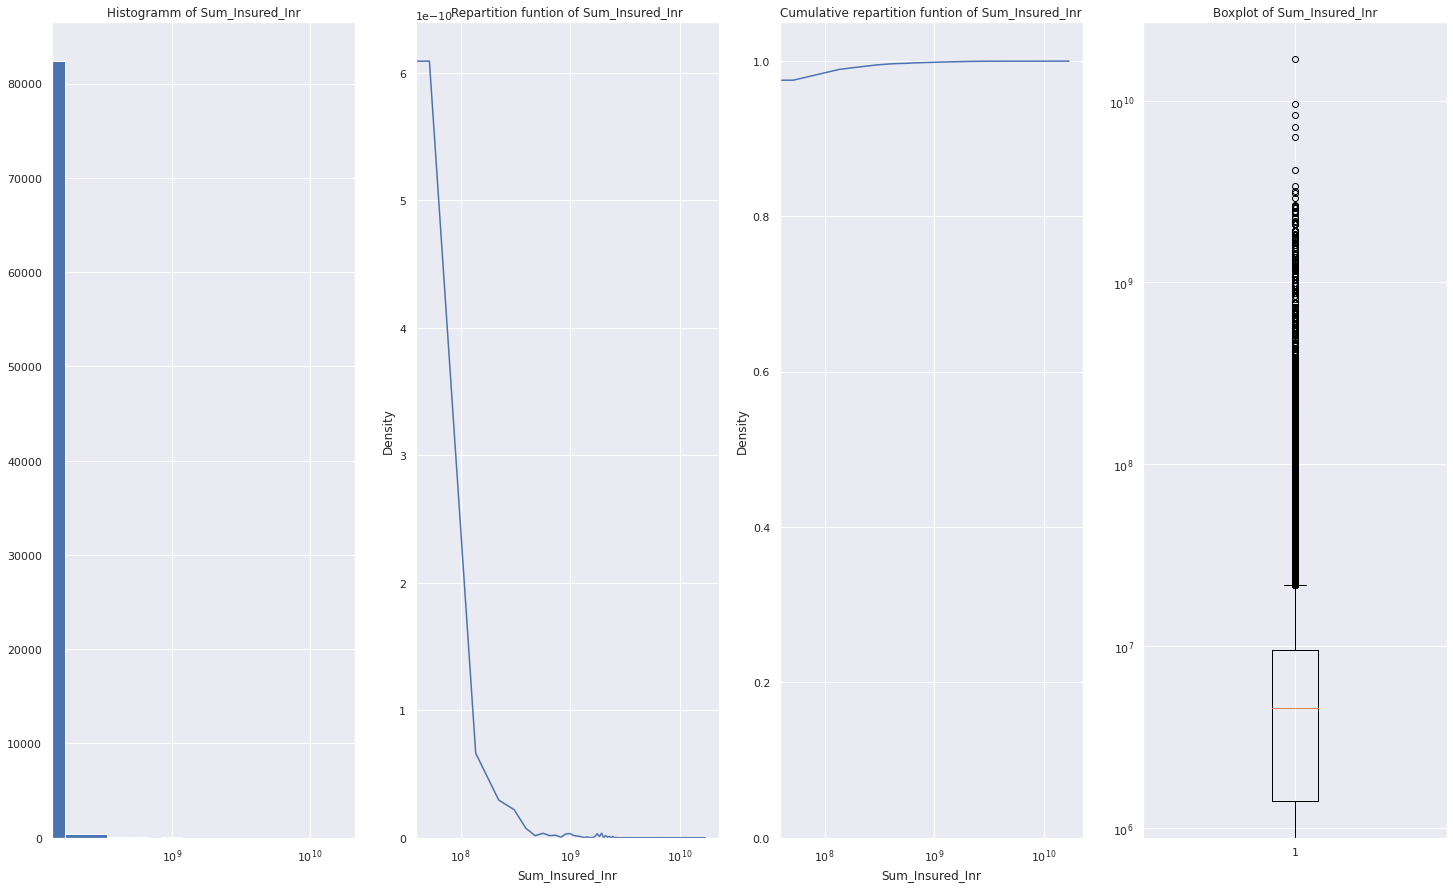

In [25]:
plot_continous_feature(df, "Sum_Insured_Inr")

### Indemnity Level

__Threshold of indemnity level used in the loss formula.__

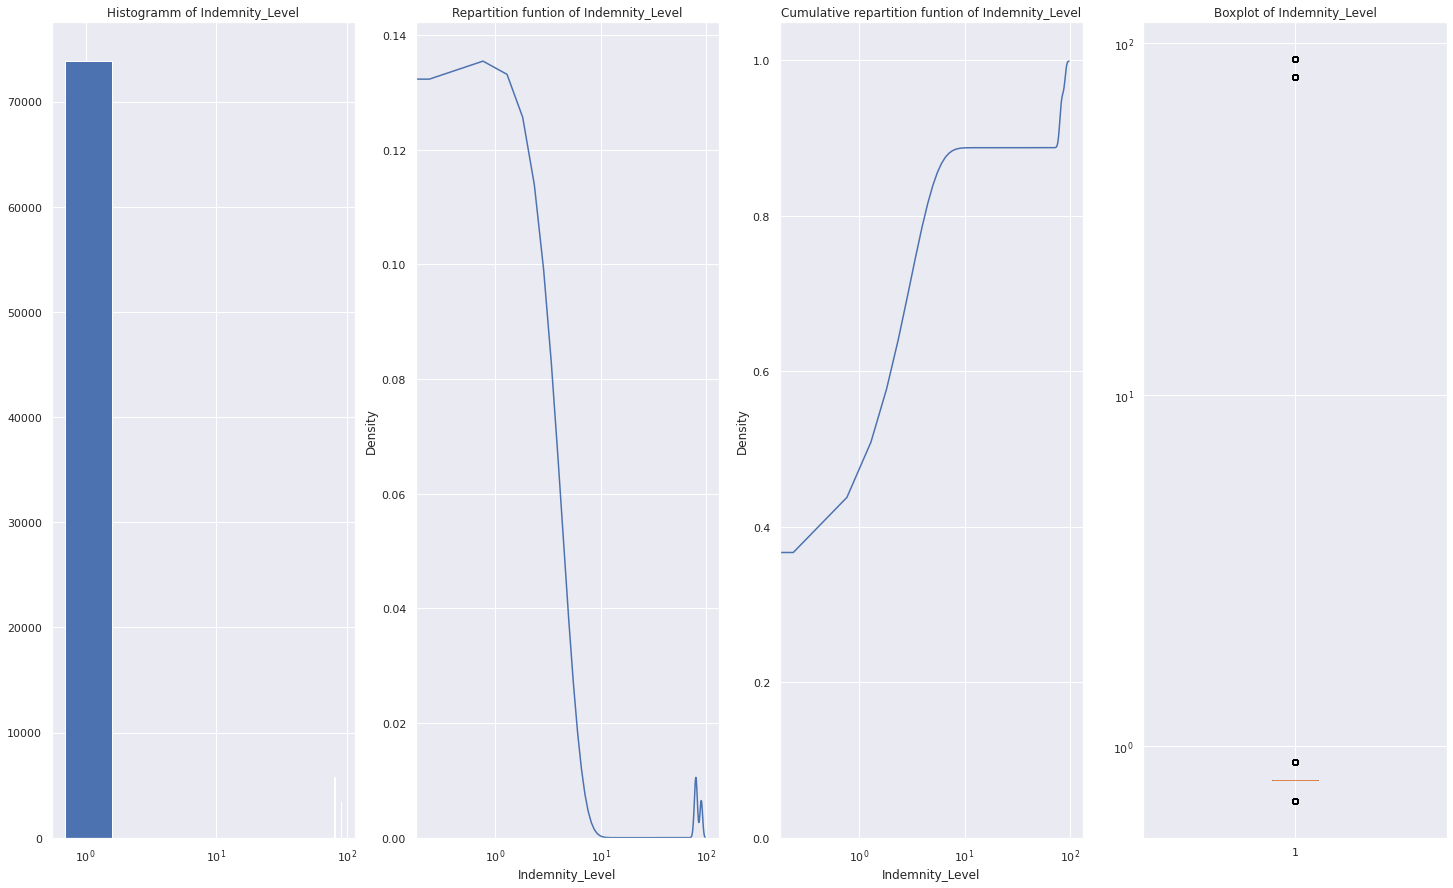

In [26]:
plot_continous_feature(df, "Indemnity_Level")

## Crops yields expoloration

__Yield harvested at a given year. The yields are often measured with a lag of 2-3 years, but the values that are obtained in the past 7 years will be used in the loss formula for a given year. In some cases, the yields will be provided at (average) district level, while in other cases, it can be given at a more granular division.__

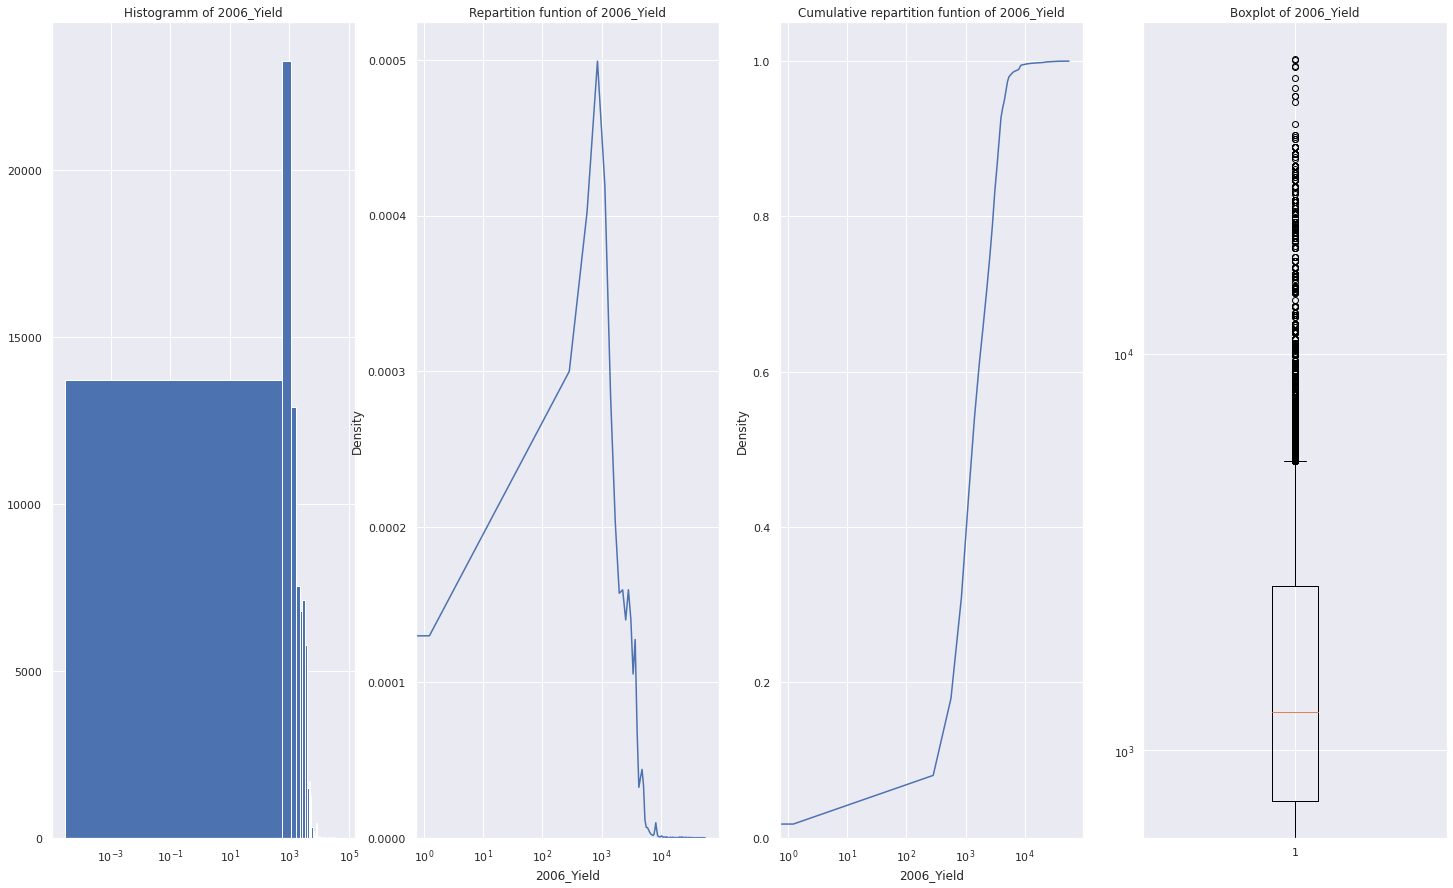

In [28]:
plot_continous_feature(df, df.years_crop_yields[0])

# Link btw features and crop yields

In [35]:
df["Mean_Years"] = df.apply(lambda x: x[df.years_crop_yields].mean(), axis=1)

## State

/appli/notebooks/../utile/data.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


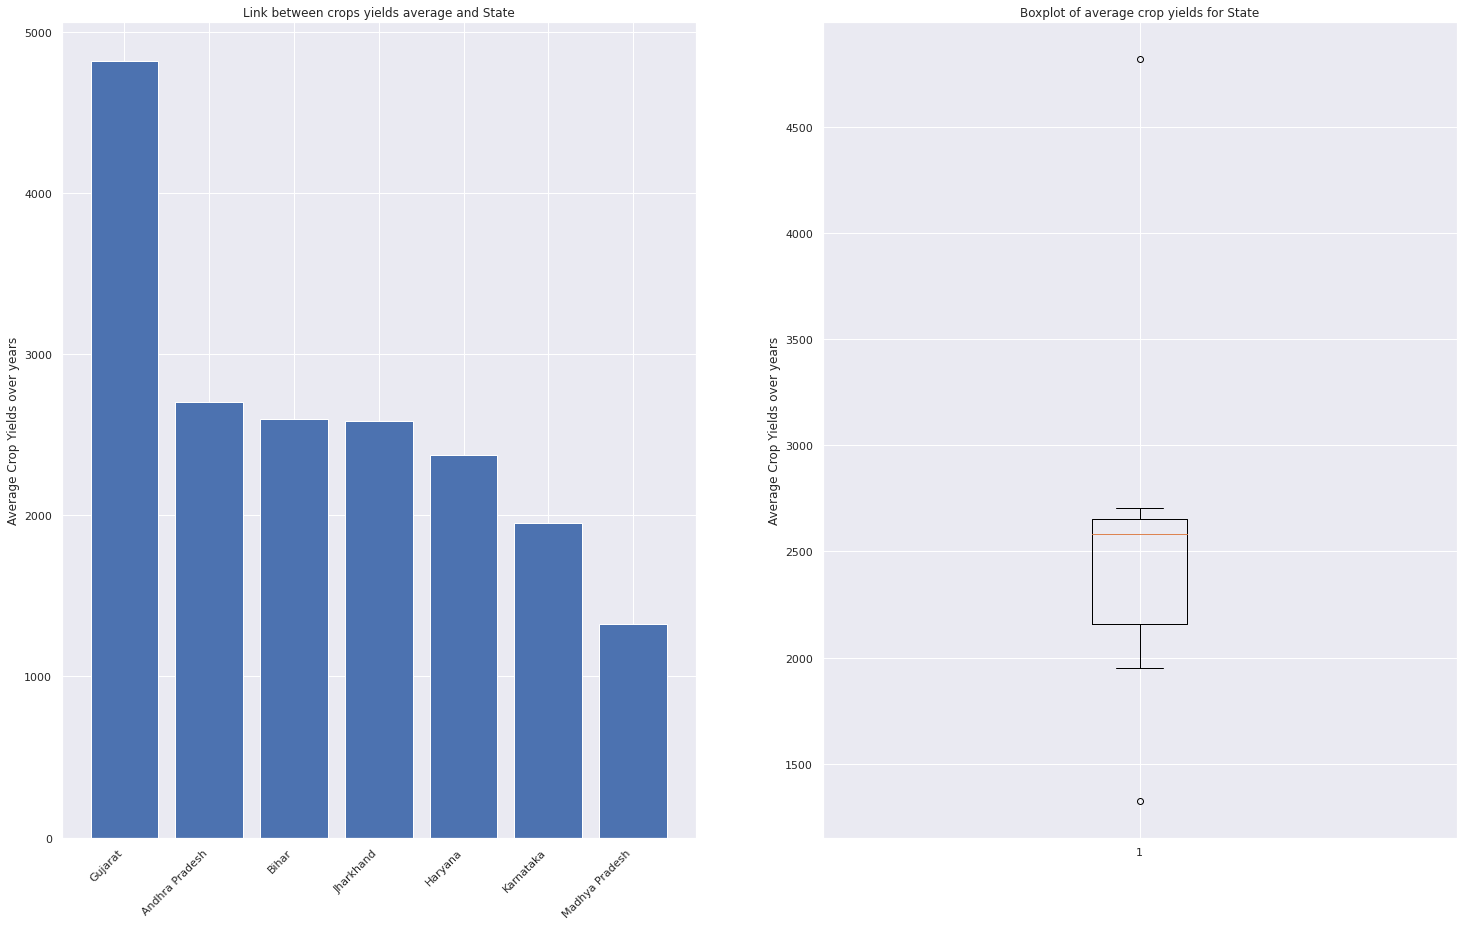

In [36]:
plot_link_texual_features(df, "State")

## Cluster

/appli/notebooks/../utile/data.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


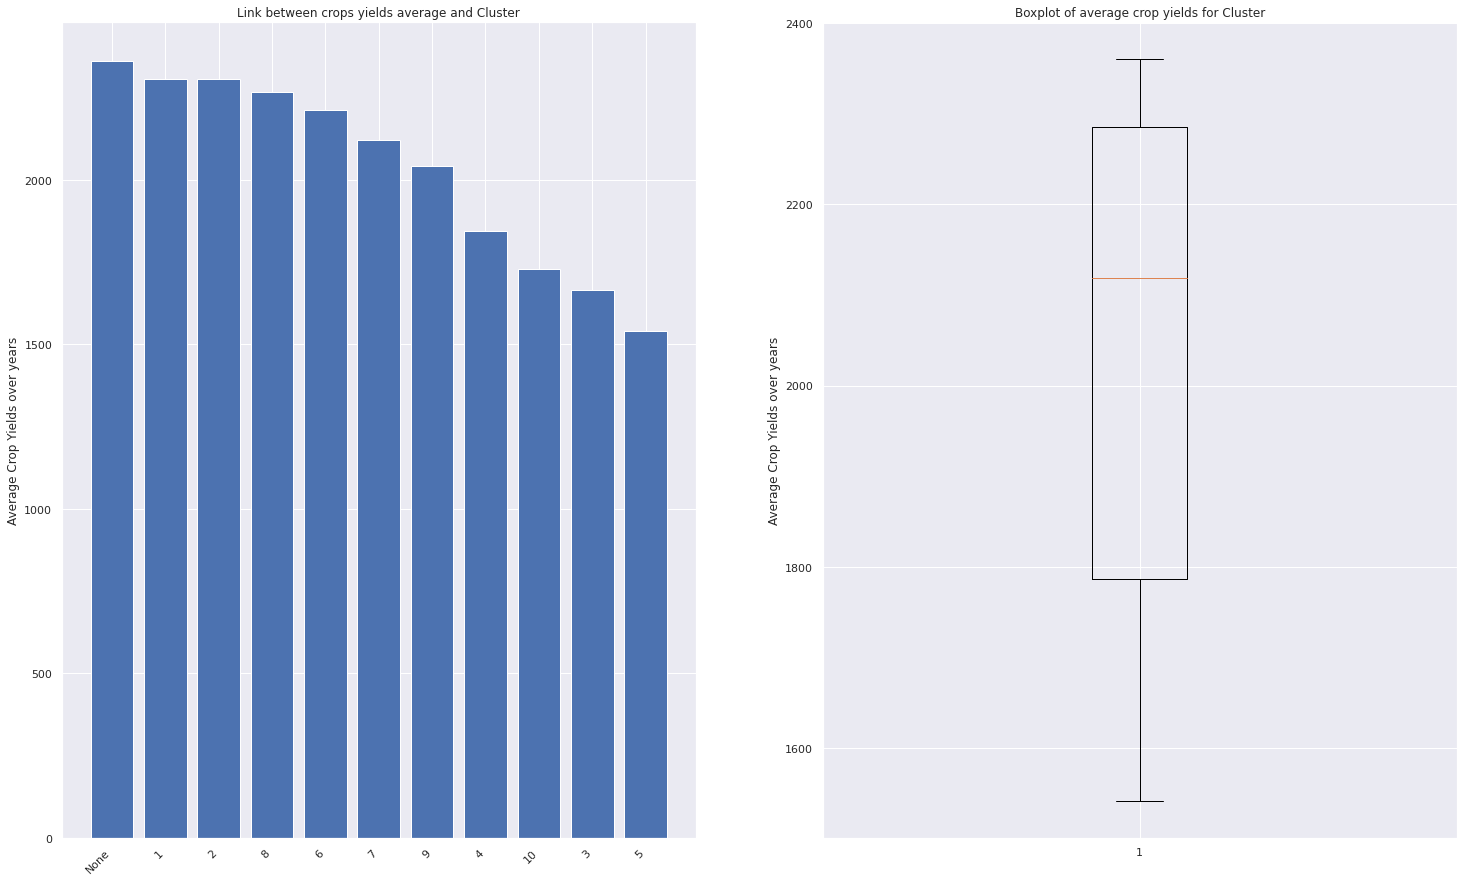

In [37]:
plot_link_texual_features(df, "Cluster")

## District

/appli/notebooks/../utile/data.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


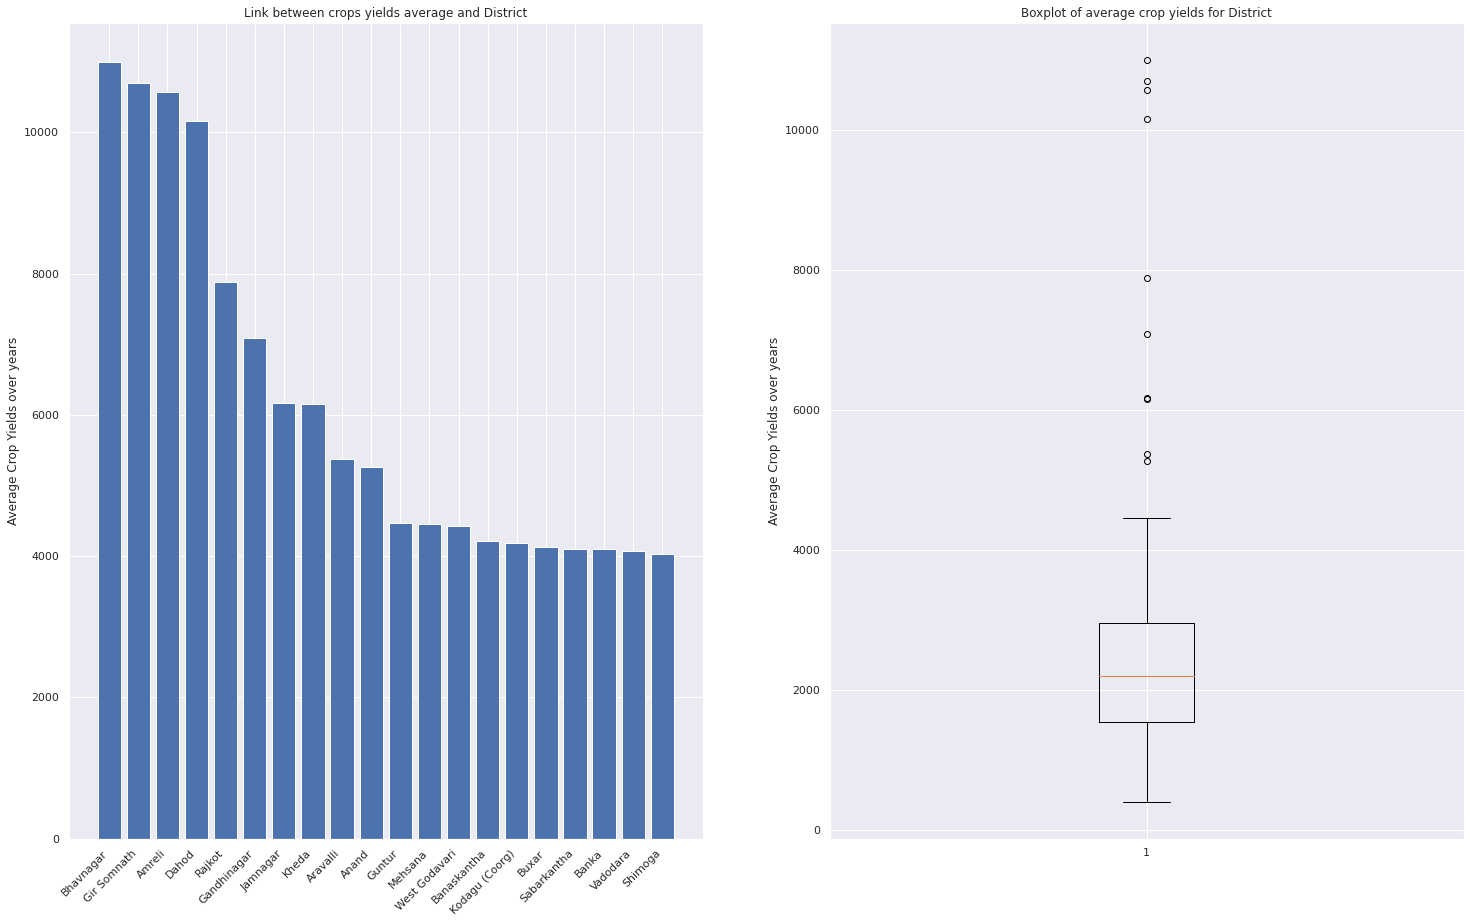

In [38]:
plot_link_texual_features(df, "District")

## Sub-district

/appli/notebooks/../utile/data.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


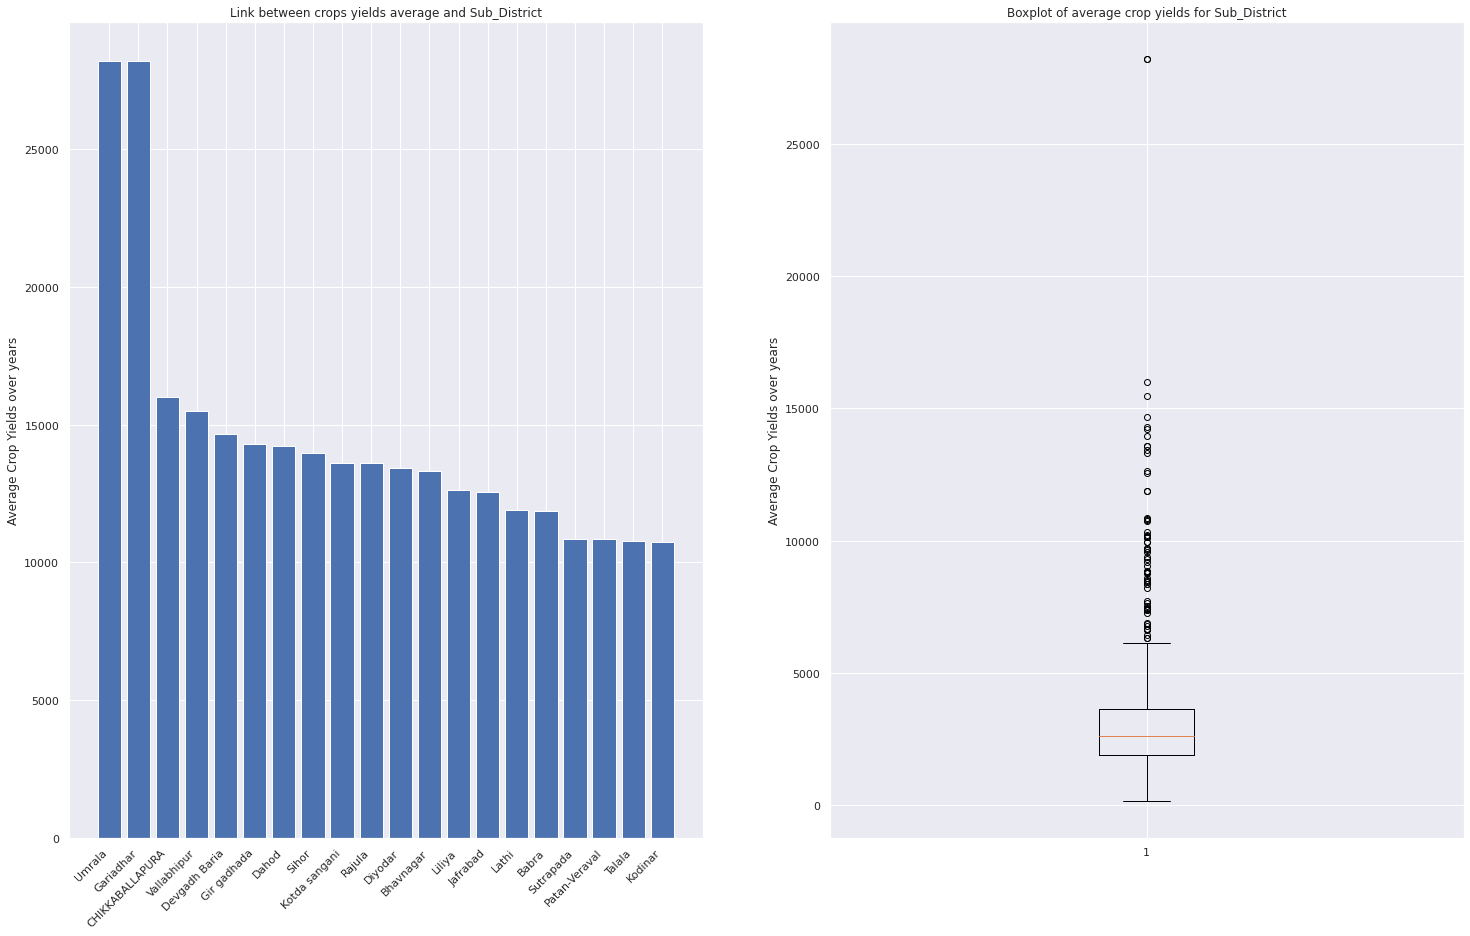

In [39]:
plot_link_texual_features(df, "Sub_District")

## Block

/appli/notebooks/../utile/data.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


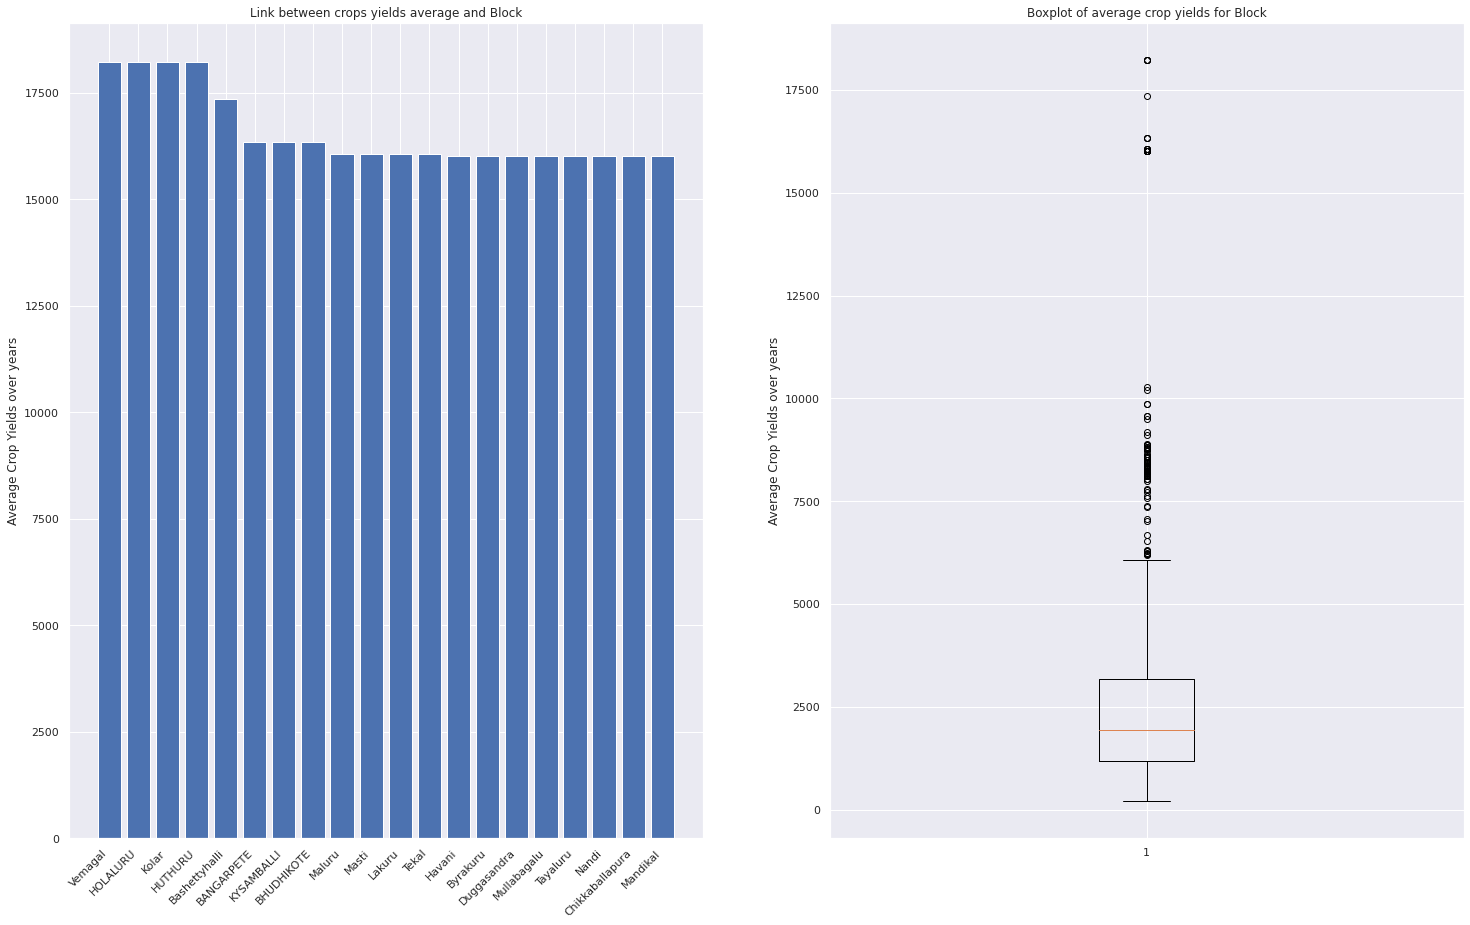

In [40]:
plot_link_texual_features(df, "Block")

## GP

/appli/notebooks/../utile/data.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


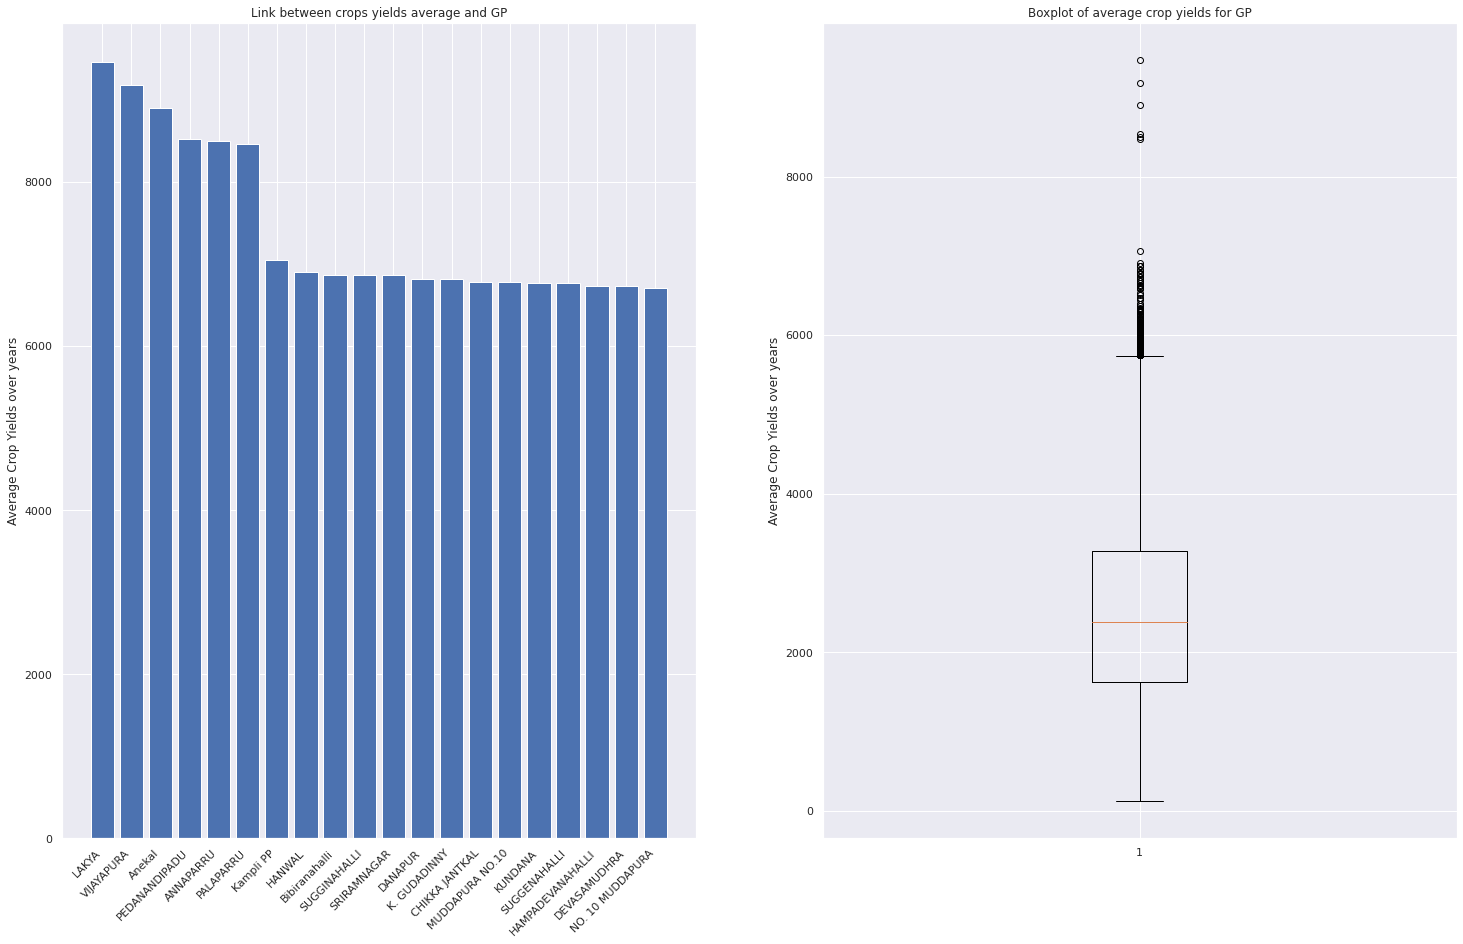

In [41]:
plot_link_texual_features(df, "GP")

## Season

/appli/notebooks/../utile/data.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


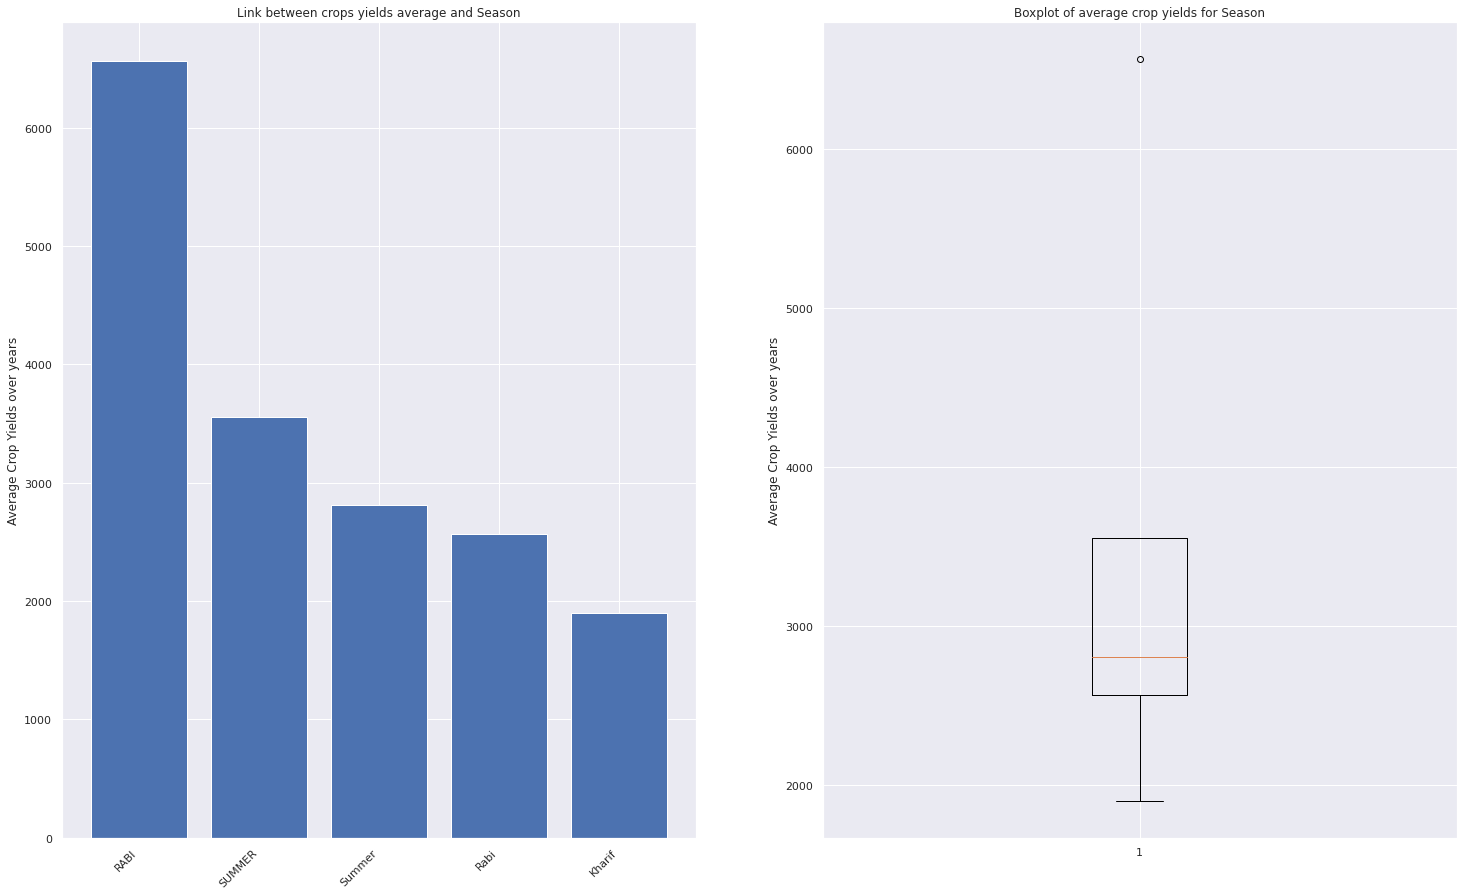

In [42]:
plot_link_texual_features(df, "Season")

## Crop

/appli/notebooks/../utile/data.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=keys, rotation=45, ha="right")


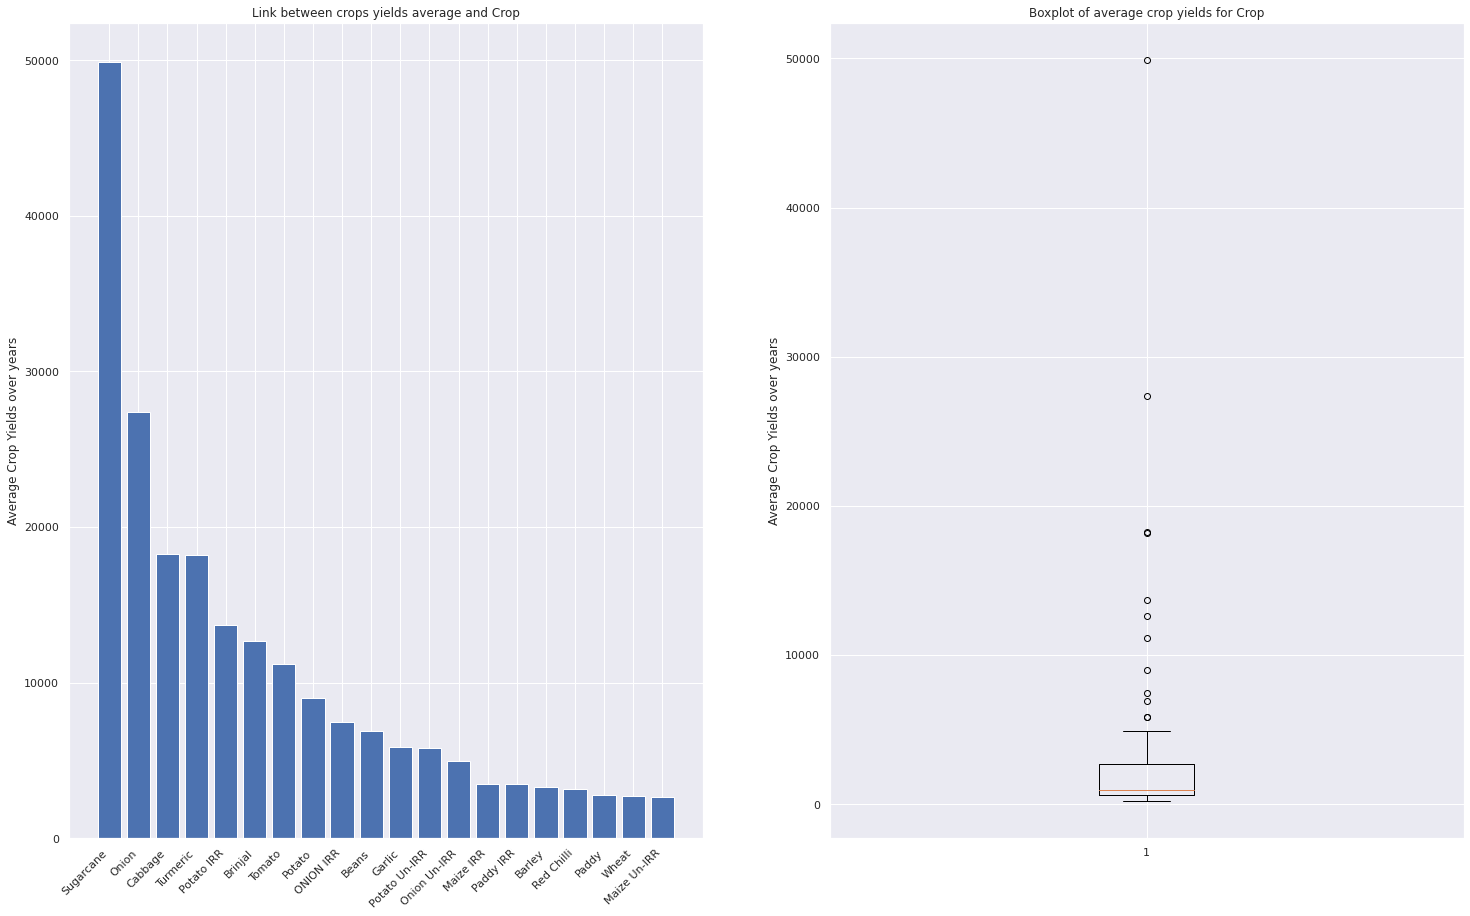

In [43]:
plot_link_texual_features(df, "Crop")

## Area Sown (Ha)

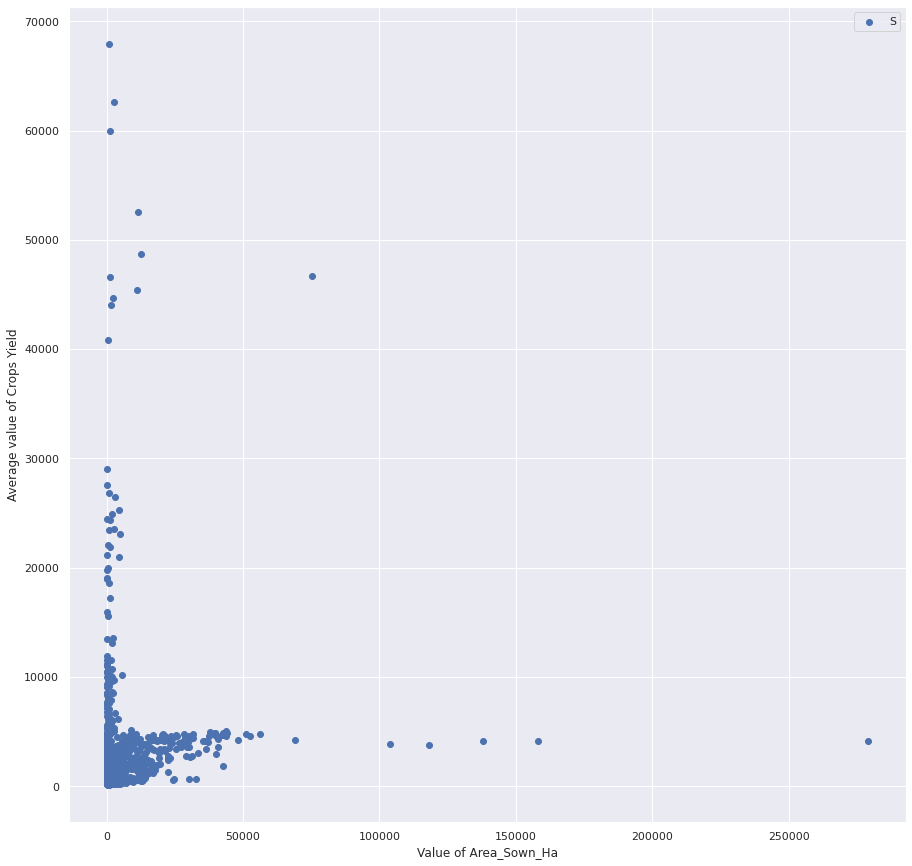

In [44]:
plot_link_numeric_features(df, "Area_Sown_Ha")

## Area Insured (Ha)

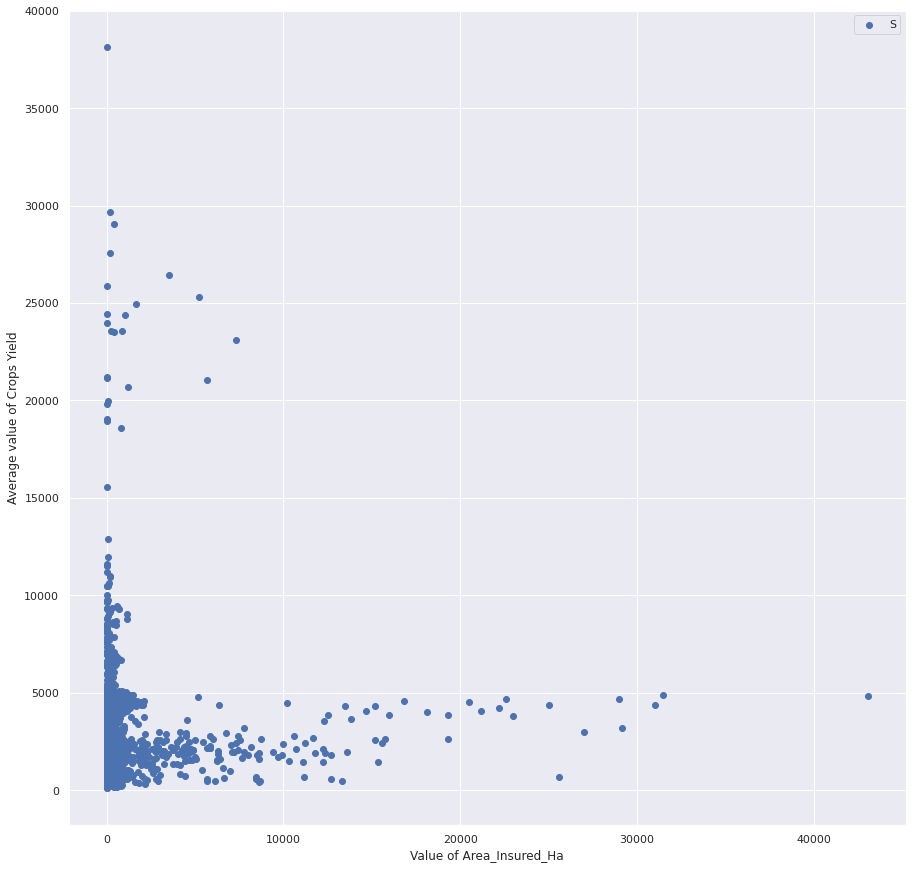

In [45]:
plot_link_numeric_features(df, "Area_Insured_Ha")

## SI Per Ha (Inr/Ha)

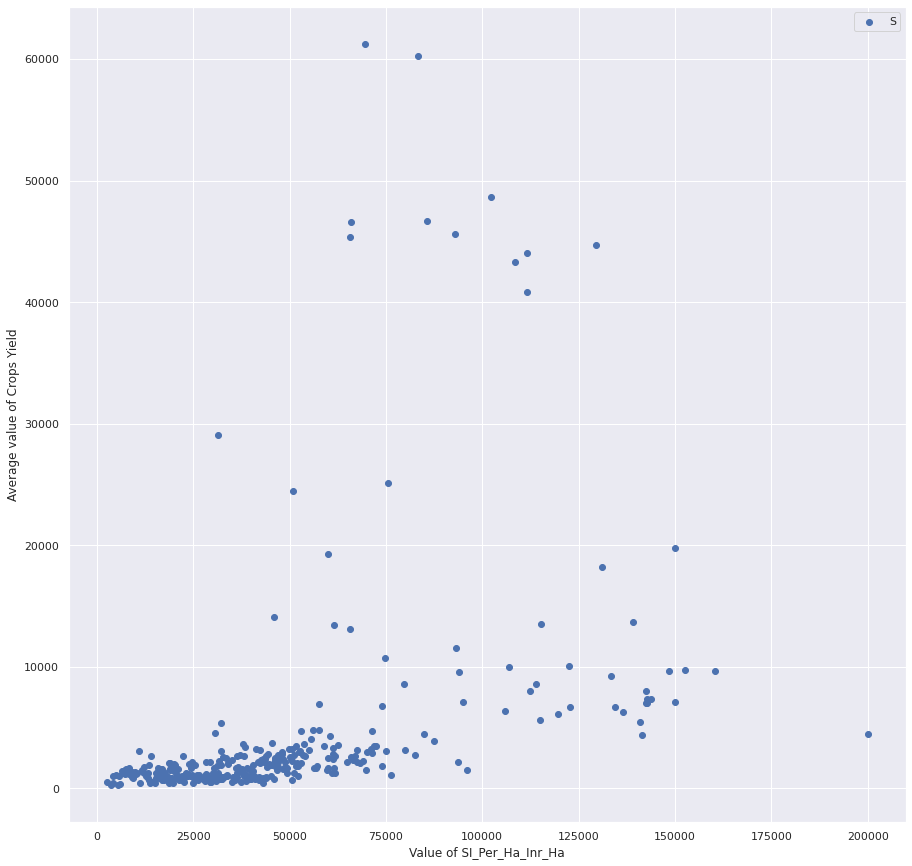

In [46]:
plot_link_numeric_features(df, "SI_Per_Ha_Inr_Ha")

## Sum Insured (Inr)

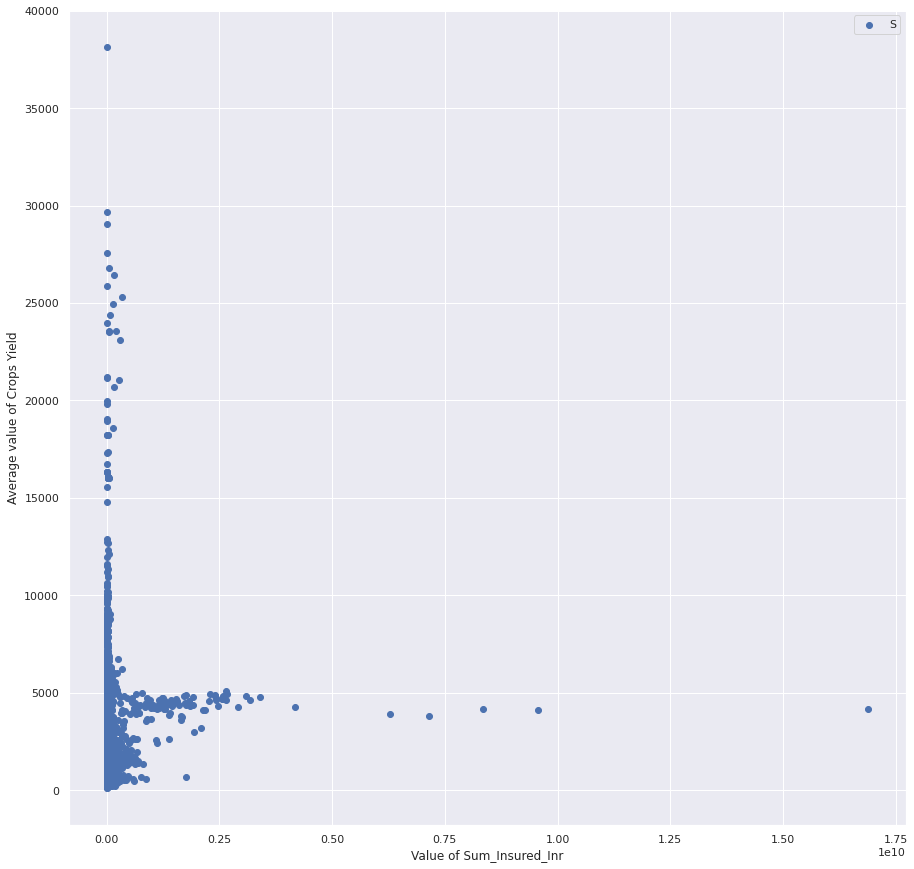

In [47]:
plot_link_numeric_features(df, "Sum_Insured_Inr")

## Indemnity Level

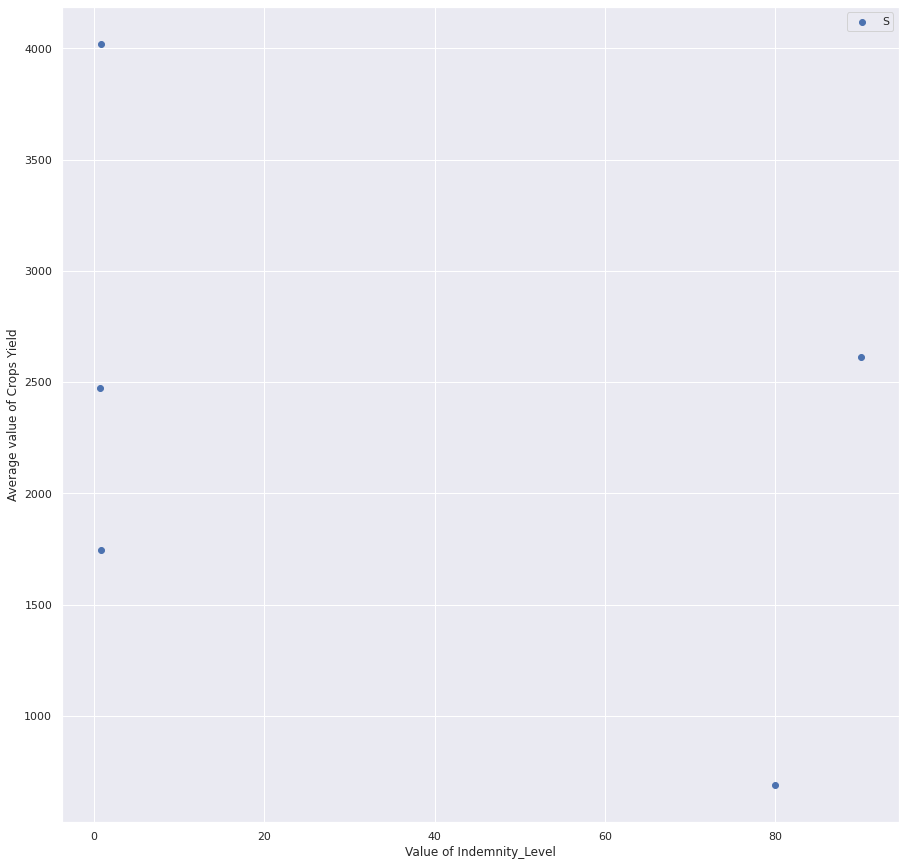

In [48]:
plot_link_numeric_features(df, "Indemnity_Level")